In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


import matplotlib.cm as cm

cmaps = [cmap for cmap in cm.datad if not cmap.endswith("_r")]
print(cmaps)

['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']


# 1.All data

In [3]:
weekly_data = pd.read_csv("D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\weekly2.csv",index_col = 0)
weekly_data = weekly_data.fillna(0)

In [4]:
weekly_data = weekly_data.rename(columns={'DPS': 'DSP','社区阳性率': 'Communities_p+', '社区ORF': 'Communities_ORF','社区N': 'Communities_N',
                                '污水处理厂阳性率': 'WWTPs_p+', '污水处理厂ORF': 'WWTPs_ORF','污水处理厂N': 'WWTPs_N',
                               '飞机阳性率': 'Flights_p+', '飞机ORF': 'Flights_ORF','飞机N': 'Flights_N',
                               '医院阳性率': 'Hospital_p+', '医院ORF': 'Hospital_ORF','医院N': 'Hospital_N',
                               '酒店阳性率': 'Hotels_p+', '酒店ORF': 'Hotels_ORF','酒店N': 'Hotels_N'})

In [7]:
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.rc('font', family='Times New Roman')
#plt.rcParams.update({'font.size': 50})
plt.rcParams.update({'font.weight': 'bold'})
#plt.style.use('classic')

num_columns = analyze_data.shape[1]  # 获取列数
num_rows = 5
num_cols = min(6, num_columns)  # 动态设置子图的列数，最多为6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 40), dpi=300)  # 创建包含指定行数和列数的子图的图形
flatten_axes = axes.flatten()  # 将子图数组扁平化，以便通过索引访问每个子图

for i, ax in enumerate(flatten_axes):
    if i < num_columns:
        column = analyze_data[analyze_data.columns[:num_columns]].columns[i]
        color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'  # 设置颜色
        ax.bar(analyze_data.index, analyze_data[column], label=column, width=0.95, color=color)
        ax.set_title(column, fontdict={'fontsize': 35, 'fontweight': 'bold'})
        ax.tick_params(axis='y', labelsize=30) 
        #ax.xaxis.set_major_locator(mdates.DayLocator(interval=10)) # 设置为每15天一个刻度
        #ax.gcf().autofmt_xdate()
        # 控制横坐标刻度
        if i // num_cols == num_rows - 1:
            ax.tick_params(axis='x', labelsize=30) 
            #ax.xaxis.set_ticklabels(rotation=45)
            ax.xaxis.set_major_locator(mdates.DayLocator(interval=16))
            # 设置 x 轴的日期格式为月份
            #ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
            ax.set_xlabel('Time', fontdict={'fontsize': 40, 'fontweight': 'bold'})
        else:
            ax.set_xticks([])  # 隐藏横坐标刻度


        # 控制纵坐标刻度
        if i % num_cols == 0:
            ax.set_ylabel('Original values', fontdict={'fontsize':40, 'fontweight': 'bold'})
        #else:
            #ax.set_yticks([])  # 不隐藏纵坐标刻度

plt.tight_layout()  # 调整子图之间的间距
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\Fig 2.png', dpi=300)
plt.show()

# 2. Standardized data 

In [5]:
from sklearn.preprocessing import MinMaxScaler


analyze_data = weekly_data.loc['2023/2/26':'2023/10/22']

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(analyze_data) 
std_df = scaler.transform(analyze_data)
std_df  = pd.DataFrame(std_df, columns= analyze_data.columns)
std_df .index = analyze_data.index
std_df = std_df.drop(std_df.index[-1:])
std_df= std_df.drop(std_df.columns[-3:], axis=1)
std_df.head(2)

SS_P+  Fever_p+  Fever__p+_Secondary+  Fever__p+__PHC  \
T                                                                     
2023/2/26  0.027807  0.716162              0.721818        0.370392   
2023/3/5   0.101783  0.216517              0.202978        0.231231   

           Fever__p+__PHC_RURAL  Fever__p+__PHC_URBAN      DSP        BI  \
T                                                                          
2023/2/26              0.278810              0.248943  0.09400  0.525152   
2023/3/5               0.059194              0.292461  0.03975  0.385647   

                 p+       ORF  ...  Communities_N  WWTPs_p+  WWTPs_ORF  \
T                              ...                                       
2023/2/26  0.500147  0.089197  ...       0.055460  0.617200   0.083660   
2023/3/5   0.339105  0.056867  ...       0.048858  0.317042   0.016355   

            WWTPs_N  Flights_p+  Flights_ORF  Flights_N  Hospital_p+  \
T                                                                      
2023/2/26  0.128891    0.333333      0.38365   0.095542     0.292683   
2023/3/5   0.035535    0.166667      0.00000   0.015787     0.365854   

           Hospital_ORF  Hospital_N  
T                                    
2023/2/26      0.014282    0.033290  
2023/3/5       0.059210    0.040151  

[2 rows x 23 columns]

## 4.2 site corr

In [8]:
site = pd.read_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\污水点类型.xlsx",index_col = 0)
site.head(2)

Hospital  WWTPs  Communities  Hotel  Flights  Overall
采样日期                                                             
2023-02-26        12     29           34      0        4       79
2023-03-05        12     32           38      0        4       86

In [31]:
std_df.columns

Index(['SS_P+', 'Fever_p+', 'Fever__p+_Secondary+', 'Fever__p+__PHC',
       'Fever__p+__PHC_RURAL', 'Fever__p+__PHC_URBAN', 'DSP', 'BI', 'p+',
       'ORF', 'N', 'Communities_p+', 'Communities_ORF', 'Communities_N',
       'WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N', 'Flights_p+', 'Flights_ORF',
       'Flights_N', 'Hospital_p+', 'Hospital_ORF', 'Hospital_N'],
      dtype='object')

In [7]:
site = pd.read_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\污水点类型.xlsx",index_col = 0)
site.head(2)

Hospital  WWTPs  Communities  Hotel  Flights  Overall
采样日期                                                             
2023-02-26        12     29           34      0        4       79
2023-03-05        12     32           38      0        4       86

In [43]:
correlations = {}
p_values = {}

for column in ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']:
    corr, p_val = pearsonr(site_df['Hospital'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)

NameError: name 'pearsonr' is not defined

In [34]:
correlations = {}
p_values = {}

for column in ['Flights_p+', 'Flights_ORF', 'Flights_N']:
    corr, p_val = pearsonr(site_df['Flights'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)

Correlation coefficients: {'Flights_p+': 0.5741721330283687, 'Flights_ORF': 0.4617349259252552, 'Flights_N': 0.4734953976818739}
P-values: {'Flights_p+': 0.0003841117507721333, 'Flights_ORF': 0.005979677691833275, 'Flights_N': 0.004677195130073151}


In [33]:
correlations = {}
p_values = {}

for column in ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']:
    corr, p_val = pearsonr(site_df['WWTPs'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)

Correlation coefficients: {'WWTPs_p+': 0.43083763346682036, 'WWTPs_ORF': -0.11659809493505711, 'WWTPs_N': -0.03720855169667463}
P-values: {'WWTPs_p+': 0.010968286488885738, 'WWTPs_ORF': 0.5113782260740348, 'WWTPs_N': 0.834512130760011}


In [32]:
correlations = {}
p_values = {}

for column in ['Communities_p+', 'Communities_ORF', 'Communities_N']:
    corr, p_val = pearsonr(site_df['Communities'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)

Correlation coefficients: {'Communities_p+': 0.06408152149805832, 'Communities_ORF': 0.543828439340255, 'Communities_N': 0.5383861957624909}
P-values: {'Communities_p+': 0.7188094875515587, 'Communities_ORF': 0.0008863636696730405, 'Communities_N': 0.0010213536875757563}


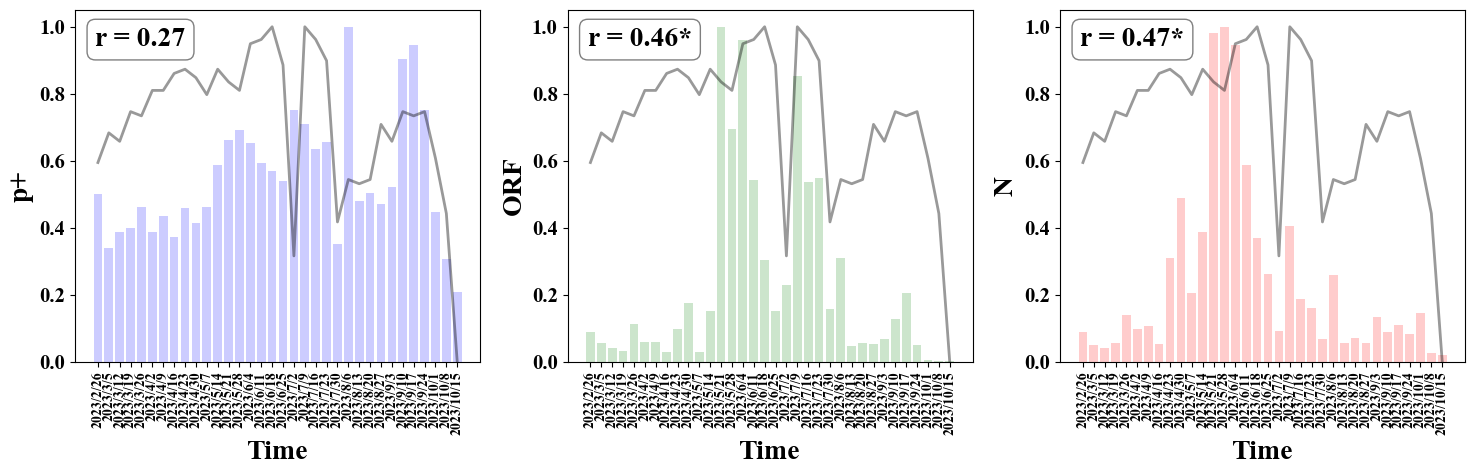

In [85]:
import datetime
import matplotlib.dates as mdates
from scipy.stats import pearsonr

plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'font.weight': 'bold'})

# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['p+', 'ORF', 'N']:
    corr, p_val = pearsonr(site_df['Overall'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['p+', 'ORF', 'N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(std_df.index, std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(std_df.index, site_df['Overall'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水总相关_site.pdf', dpi=300)
plt.show()

Correlation coefficients: {'Hospital_p+': 0.41212401473768784, 'Hospital_ORF': 0.13946680478785292, 'Hospital_N': 0.12954278351954138}
P-values: {'Hospital_p+': 0.015438491442753527, 'Hospital_ORF': 0.431479631932667, 'Hospital_N': 0.4652743660287138}


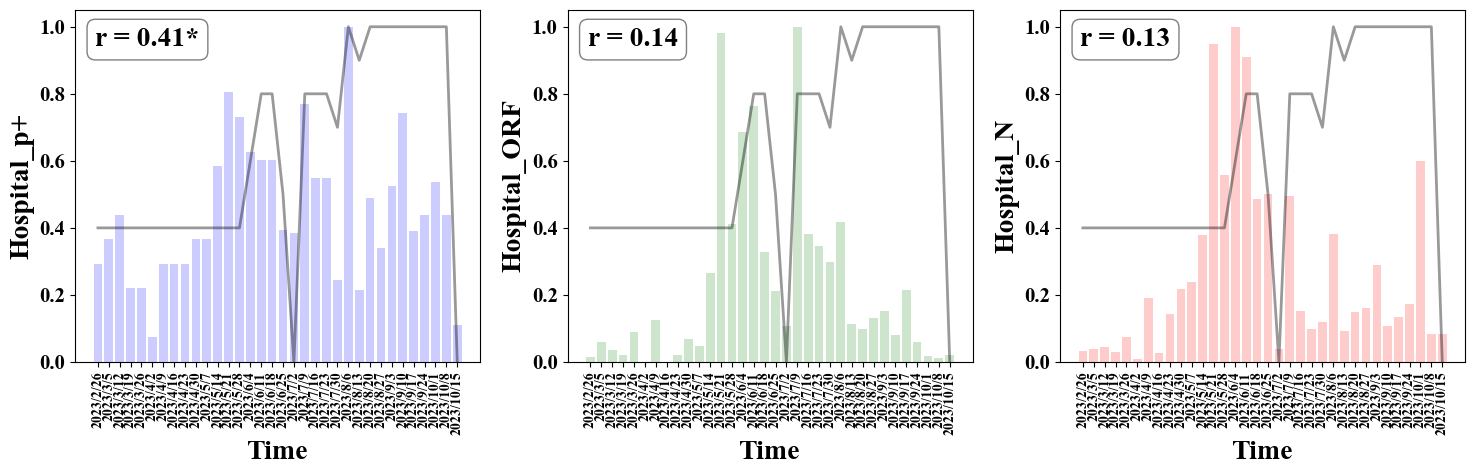

In [86]:
correlations = {}
p_values = {}

for column in ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']:
    corr, p_val = pearsonr(site_df['Hospital'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(std_df.index, std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(std_df.index, site_df['Hospital'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水总相关_Hospital.pdf', dpi=300)
plt.show()

Correlation coefficients: {'Communities_p+': 0.06408152149805832, 'Communities_ORF': 0.543828439340255, 'Communities_N': 0.5383861957624909}
P-values: {'Communities_p+': 0.7188094875515587, 'Communities_ORF': 0.0008863636696730405, 'Communities_N': 0.0010213536875757563}


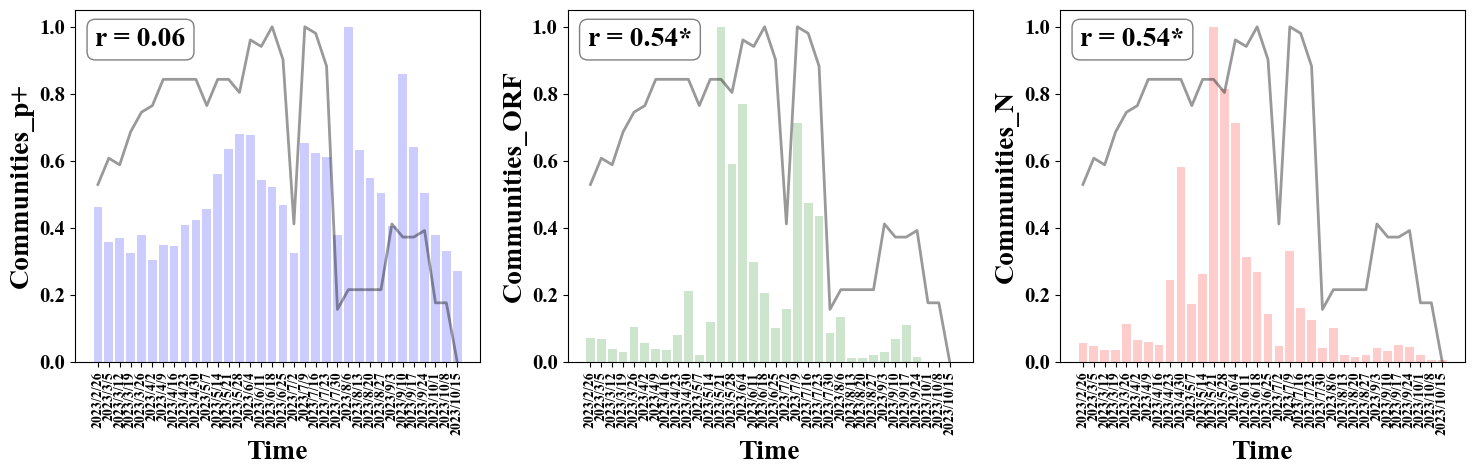

In [89]:
correlations = {}
p_values = {}

for column in ['Communities_p+', 'Communities_ORF', 'Communities_N']:
    corr, p_val = pearsonr(site_df['Communities'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Communities_p+', 'Communities_ORF', 'Communities_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(std_df.index, std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(std_df.index, site_df['Communities'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水总相关_社区.pdf', dpi=300)
plt.show()

Correlation coefficients: {'WWTPs_p+': 0.43083763346682036, 'WWTPs_ORF': -0.11659809493505711, 'WWTPs_N': -0.03720855169667463}
P-values: {'WWTPs_p+': 0.010968286488885738, 'WWTPs_ORF': 0.5113782260740348, 'WWTPs_N': 0.834512130760011}


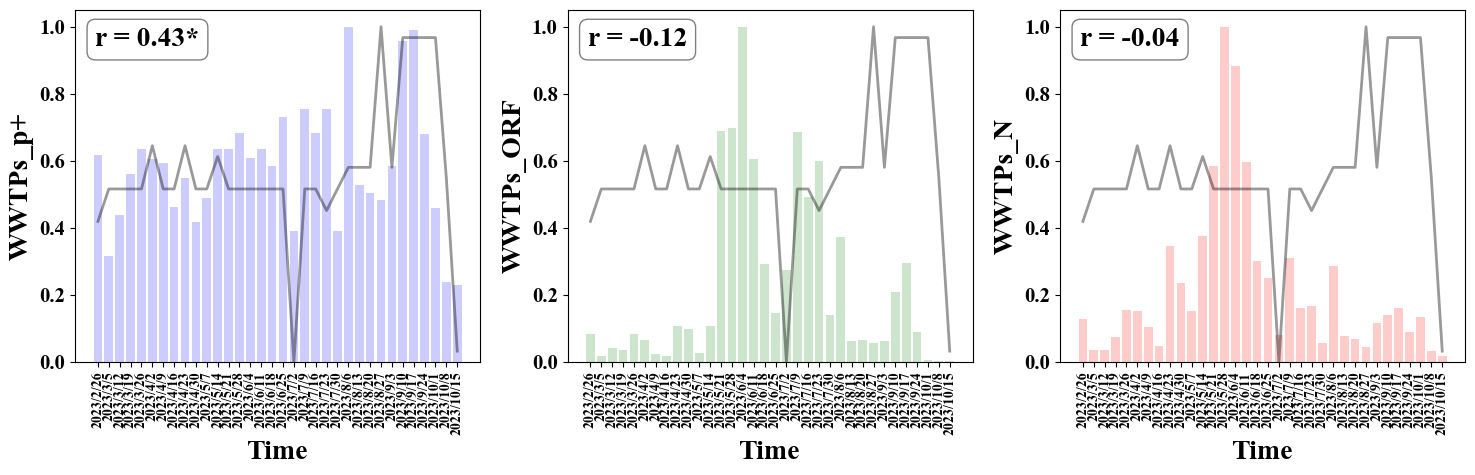

In [88]:
correlations = {}
p_values = {}

for column in ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']:
    corr, p_val = pearsonr(site_df['WWTPs'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val
    
# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(std_df.index, std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(std_df.index, site_df['WWTPs'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水总相关_WWTPs.pdf', dpi=300)
plt.show()

Correlation coefficients: {'Flights_p+': 0.5741721330283687, 'Flights_ORF': 0.4617349259252552, 'Flights_N': 0.4734953976818739}
P-values: {'Flights_p+': 0.0003841117507721333, 'Flights_ORF': 0.005979677691833275, 'Flights_N': 0.004677195130073151}


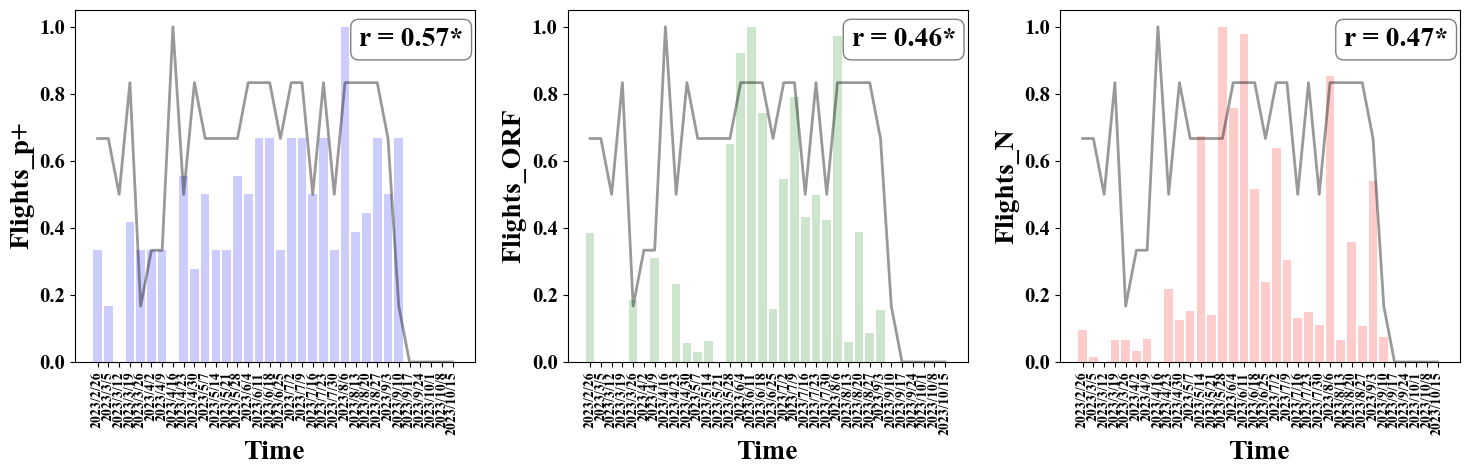

In [91]:
correlations = {}
p_values = {}

for column in ['Flights_p+', 'Flights_ORF', 'Flights_N']:
    corr, p_val = pearsonr(site_df['Flights'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Flights_p+', 'Flights_ORF', 'Flights_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(std_df.index, std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(std_df.index, site_df['Flights'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.71, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水总相关_Flights.pdf', dpi=300)
plt.show()

In [9]:
std_df = std_df.rename(columns={'社区阳性率': 'Communities_p+', '社区ORF': 'Communities_ORF','社区N': 'Communities_N',
                                '污水处理厂阳性率': 'WWTPs_p+', '污水处理厂ORF': 'WWTPs_ORF','污水处理厂N': 'WWTPs_N',
                               '飞机阳性率': 'Flights_p+', '飞机ORF': 'Flights_ORF','飞机N': 'Flights_N',
                               '医院阳性率': 'Hospital_p+', '医院ORF': 'Hospital_ORF','医院N': 'Hospital_N',
                               '酒店阳性率': 'Hotels_p+', '酒店ORF': 'Hotels_ORF','酒店N': 'Hotels_N'})

In [11]:
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 50})

num_columns = std_df.shape[1] 
num_rows = 5
num_cols = min(5, num_columns) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 60), dpi=300)  # 创建包含指定行数和列数的子图的图形
flatten_axes = axes.flatten()  

for i, ax in enumerate(flatten_axes):
    if i < num_columns:
        column = std_df[weekly_data.columns[:num_columns]].columns[i]
        color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'  # 设置颜色
        ax.bar(std_df.index, std_df[column], label=column, width=0.95, color=color)
        ax.set_ylim(0,1.05)
        #title = f'({chr(ord("A") + i)}) {column}' 
    
        ax.set_title(column, fontdict={'fontsize': 70, 'fontweight': 'bold'})
        
    if i // num_cols == num_rows - 1:
            ax.tick_params(axis='x', labelsize=60) 
            ax.set_ylim(-0.05,1.05)
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1)) 
            
            
            
            ax.set_xlabel('Time', fontdict={'fontsize':75, 'fontweight': 'bold'})
    else:
        ax.set_xticks([])  # 隐藏横坐标刻度


        # 控制纵坐标刻度
    if i % num_cols == 0:
        ax.tick_params(axis='y', labelsize=60) 
        ax.set_ylabel('Standard data', fontdict={'fontsize':75, 'fontweight': 'bold'})
    else:
        ax.set_yticks([])  # 不隐藏纵坐标刻度
        

fig.subplots_adjust(wspace=0.3, hspace=0.2)  # 调整子图之间的间距
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\manuscript_new\\manuscript\\Supplementary Material\\Fig S1.pdf', dpi=300)
plt.show()

# 3. Signal detection

In [95]:
from scipy.signal import find_peaks
# 初始化空的 DataFrame
result_df = pd.DataFrame(columns=['column', 'peaks', 'valleys', 'n_peaks', 'n_valleys'])

# 寻找峰和谷
for i, column in enumerate(std_df.columns):
    data = std_df[column]
    peaks, _ = find_peaks(data)
    valleys, _ = find_peaks(-data)
    
    # 计算峰和谷的数量
    n_peaks = len(peaks)
    n_valleys = len(valleys)
    
    # 创建一个包含结果的临时 DataFrame
    result = [column, peaks, valleys, n_peaks, n_valleys]
    temp_df = pd.DataFrame([result], columns=['column', 'peaks', 'valleys', 'n_peaks', 'n_valleys'])
    
    # 使用 pd.concat 添加临时 DataFrame
    result_df = pd.concat([result_df, temp_df], ignore_index=True)


result_df.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\manuscript_new\\manuscript\\Supplementary Material\\峰谷.xlsx')

C:\Users\ZERO\AppData\Local\Temp\ipykernel_20008\2992663409.py:23: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  result_df.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\manuscript_new\\manuscript\\Supplementary Material\\峰谷.xlsx')


AttributeError: 'DataFrame' object has no attribute 'append'

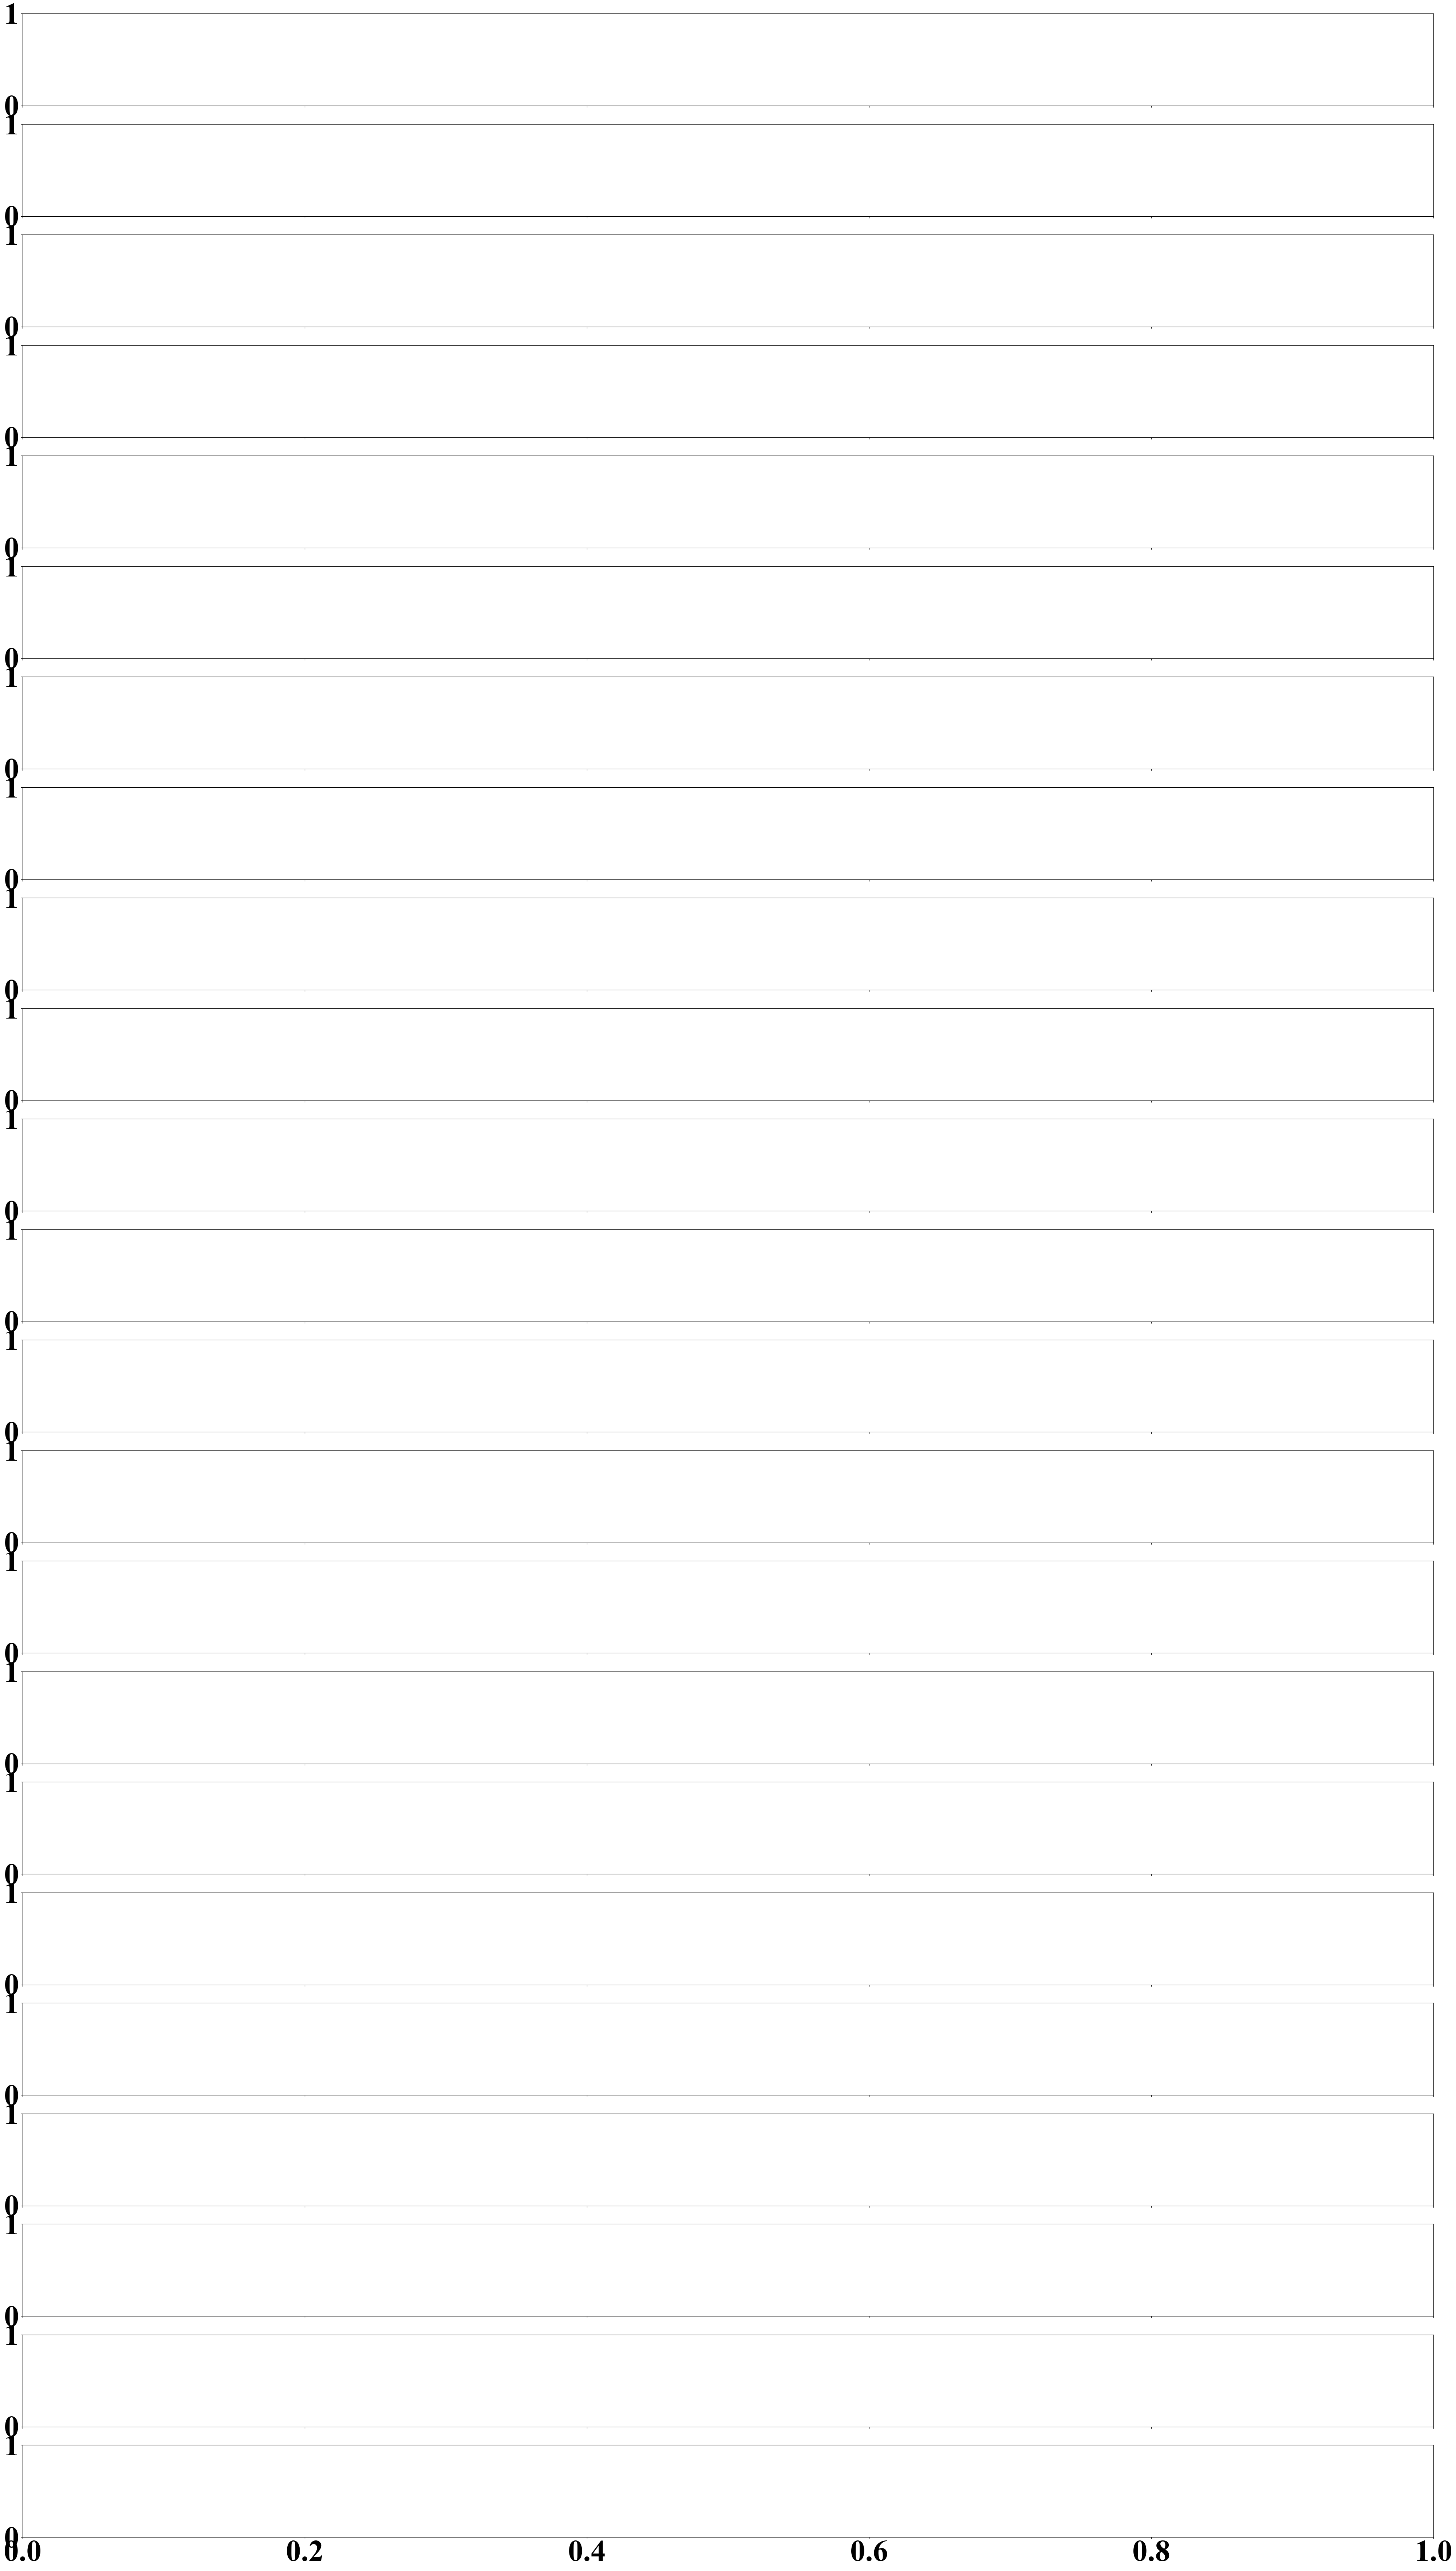

In [92]:
from scipy.signal import find_peaks

plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size': 60})
plt.rcParams.update({'font.weight': 'bold'})



result_df = pd.DataFrame()


fig, axs = plt.subplots(len(std_df.columns), sharex=True, figsize=(50, 90))

for i, column in enumerate(std_df.columns):
    data = std_df[column]
    peaks, _ = find_peaks(data)
    valleys, _ = find_peaks(-data)
    

    result = [column, peaks, valleys]
    

    temp_df = pd.DataFrame([result], columns=['column', 'peaks', 'valleys'])
    
    
    result_df = result_df.append(temp_df, ignore_index=True)

    axs[i].plot(data, linewidth=6, color= '#CA94C6')
    axs[i].fill_between(data.index, 0, data.values, alpha = 0.3,  color = '#CA94C6')
    axs[i].scatter(peaks, data[peaks], c='#1A9E76', label='Peaks', s=2400, marker='*')
    axs[i].scatter(valleys, data[valleys], c='#766FB3', label='Valleys',s= 2400)
    #axs[i].set_ylabel('Value', )
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    title_font = {'fontsize':70, 'fontweight': 'bold','color': title_color}
    axs[i].set_title(f'{column}', fontdict=title_font)
    axs[i].set_ylim(-0.2,1.2)
    axs[7].set_ylabel('Standard data', fontdict= {'fontsize':90, 'fontweight': 'bold'})
plt.tight_layout()
plt.xlabel('Time', fontdict={'fontsize':90, 'fontweight': 'bold'})


plt.xlim(std_df.index[0], std_df.index[-1])

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
#plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\峰谷（信号检测）.pdf', dpi=300)

plt.show()

In [ ]:
# 将数据转换为 DataFrame
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'font.weight': 'bold'})

data = result_df['peaks']
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# 创建一个空的矩阵来表示热图
heatmap_data = np.zeros((len(df.columns), 35))

# 填充矩阵
for i, col in enumerate(df.columns):
    for val in df[col].dropna():
        heatmap_data[i, int(val)] = 1

# 创建一个 DataFrame 来表示热图数据
heatmap_df = pd.DataFrame(heatmap_data, index=std_df.columns, columns=range(35))

# 绘制热图
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, cmap='Reds', cbar=False, linewidths=.5, linecolor='black',alpha = 0.7)
title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
# 设置x轴和y轴标签
plt.xlabel('Weeks', fontdict= {'fontsize':20, 'fontweight': 'bold'})
#plt.ylabel('Surveillance system', fontdict= {'fontsize':20, 'fontweight': 'bold'})

# 设置x轴刻度
plt.xticks(np.arange(0.5, 35.5, 1), range(35) )
plt.yticks(np.arange(len(df.columns)) + 0.5,std_df.columns, rotation=0)
# 获取当前的 y 轴刻度标签对象
yticks = plt.gca().get_yticklabels()

# 设置 y 轴刻度标签的颜色
for i, tick in enumerate(yticks):
    if i == 7:
        tick.set_color('#FF9282')
    elif i < 7:
        tick.set_color('#8099FF')
    else:
        tick.set_color('#7CC8C5')
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\res补\\峰谷（信号检测）峰汇总.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
data = result_df['valleys']
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# 创建一个空的矩阵来表示热图
heatmap_data = np.zeros((len(df.columns), 35))

# 填充矩阵
for i, col in enumerate(df.columns):
    for val in df[col].dropna():
        heatmap_data[i, int(val)] = 1

# 创建一个 DataFrame 来表示热图数据
heatmap_df = pd.DataFrame(heatmap_data, index=std_df.columns, columns=range(35))

# 绘制热图
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, cmap='Greens', cbar=False, linewidths=.5, linecolor='black',alpha = 0.7)
#title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
# 设置x轴和y轴标签
plt.xlabel('Weeks', fontdict= {'fontsize':20, 'fontweight': 'bold'})
#plt.ylabel('Surveillance system', fontdict= {'fontsize':20, 'fontweight': 'bold'})

# 设置x轴刻度
plt.xticks(np.arange(0.5, 35.5, 1), range(35) )
plt.yticks(np.arange(len(df.columns)) + 0.5,std_df.columns, rotation=0)
# 设置 y 轴刻度标签的颜色
yticks = plt.gca().get_yticklabels()
for i, tick in enumerate(yticks):
    if i == 7:
        tick.set_color('#FF9282')
    elif i < 7:
        tick.set_color('#8099FF')
    else:
        tick.set_color('#7CC8C5')
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\res补\\峰谷（信号检测）谷汇总.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
columns_to_keep = list(set(std_df.columns) - set(std_df.columns[2:6]) - set(std_df.columns[11:]))
new_df = std_df[columns_to_keep].copy()

new_column_order = ['SS_P+', 'Fever_p+', 'DSP', 'BI', 'N', 'ORF', 'p+']

new_df = new_df.reindex(columns=new_column_order)

fig, axs = plt.subplots(len(new_df.columns), sharex=True, figsize=(30, 70))

for i, column in enumerate(new_df.columns):
    data = new_df[column]
    peaks, _ = find_peaks(data)
    valleys, _ = find_peaks(-data)
    

    result = [column, peaks, valleys]
    

    temp_df = pd.DataFrame([result], columns=['column', 'peaks', 'valleys'])
    
    # 将当前结果 DataFrame 追加到最终结果 DataFrame 中
    result_df = result_df.append(temp_df, ignore_index=True)
    title_color = '#FF9282' if i == 3 else '#8099FF' if i < 3 else '#7CC8C5'
    axs[i].plot(data, linewidth=6, color= title_color)
    axs[i].fill_between(data.index, -0.03, data.values, alpha = 0.3,  color = title_color)
    axs[i].scatter(peaks, data[peaks], c='#1A9E76', label='Peaks', s=2400, marker='*')
    axs[i].scatter(valleys, data[valleys], c='#766FB3', label='Valleys',s= 2400)
    #axs[i].set_ylabel('Value', )
    
    title_font = {'fontsize':70, 'fontweight': 'bold','color': title_color}
    axs[i].set_title(f'{column}', fontdict=title_font)
    axs[i].set_ylim(-0.03,1.2)
    axs[i].set_ylabel('Standard data', fontdict= {'fontsize':60, 'fontweight': 'bold'})
plt.tight_layout()
plt.xlabel('Time', fontdict={'fontsize':60, 'fontweight': 'bold'})


plt.xlim(new_df.index[0], new_df.index[-1])
#plt.ylim(0, 1.2)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\所有峰谷（信号检测）.pdf', dpi=300)
# 显示图形
plt.show()

In [ ]:
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size': 40})
plt.rcParams.update({'font.weight': 'bold'})

result_df = pd.DataFrame()


fig, axs = plt.subplots(len(std_df.columns[1:6]), sharex=True, figsize=(30, 30))

for i, column in enumerate(std_df.columns[1:6]):
    data = std_df.iloc[:, 1:6][column]
    peaks, _ = find_peaks(data)
    valleys, _ = find_peaks(-data)
    

    result = [column, peaks, valleys]
    

    temp_df = pd.DataFrame([result], columns=['column', 'peaks', 'valleys'])
    
    # 将当前结果 DataFrame 追加到最终结果 DataFrame 中
    result_df = result_df.append(temp_df, ignore_index=True)

    axs[i].plot(data, linewidth=6, color= '#FF9282')
    axs[i].fill_between(data.index, -0.05, data.values, alpha = 0.3,  color = '#FF9282')
    axs[i].scatter(peaks, data[peaks], c='#1A9E76', label='Peaks', s=2400, marker='*')
    axs[i].scatter(valleys, data[valleys], c='#766FB3', label='Valleys',s= 2400)
    #axs[i].set_ylabel('Value', )
    #title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    title_font = {'fontsize':60, 'fontweight': 'bold'}
    axs[i].set_title(f'{column}', fontdict=title_font)
    axs[i].set_ylim(-0.05,1.2)
    axs[i].set_ylabel('Standard data', fontdict= {'fontsize':45, 'fontweight': 'bold'})
plt.tight_layout()
plt.xlabel('Time', fontdict={'fontsize':45, 'fontweight': 'bold'})


plt.xlim(std_df.index[0], std_df.index[-1])
#plt.ylim(0, 1.2)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\Fever_峰谷（信号检测）.pdf', dpi=300)
# 显示图形
plt.show()

In [ ]:
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size': 40})
plt.rcParams.update({'font.weight': 'bold'})

result_df = pd.DataFrame()


fig, axs = plt.subplots(len(std_df.columns[8:]), sharex=True, figsize=(30, 80))

for i, column in enumerate(std_df.columns[8:]):
    data = std_df.iloc[:, 8:][column]
    peaks, _ = find_peaks(data)
    valleys, _ = find_peaks(-data)
    

    result = [column, peaks, valleys]
    

    temp_df = pd.DataFrame([result], columns=['column', 'peaks', 'valleys'])
    
    # 将当前结果 DataFrame 追加到最终结果 DataFrame 中
    result_df = result_df.append(temp_df, ignore_index=True)

    axs[i].plot(data, linewidth=6, color= '#7CC8C5')
    axs[i].fill_between(data.index, -0.05, data.values, alpha = 0.3,  color = '#7CC8C5')
    axs[i].scatter(peaks, data[peaks], c='#1A9E76', label='Peaks', s=2400, marker='*')
    axs[i].scatter(valleys, data[valleys], c='#766FB3', label='Valleys',s= 2400)
    #axs[i].set_ylabel('Value', )
    #title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    title_font = {'fontsize':60, 'fontweight': 'bold'}
    axs[i].set_title(f'{column}', fontdict=title_font)
    axs[i].set_ylim(-0.05,1.2)
    axs[i].set_ylabel('Standard data', fontdict= {'fontsize':45, 'fontweight': 'bold'})
plt.tight_layout()
plt.xlabel('Time', fontdict={'fontsize':45, 'fontweight': 'bold'})


plt.xlim(std_df.index[0], std_df.index[-1])
#plt.ylim(0, 1.2)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水_峰谷（信号检测）.pdf', dpi=300)
# 显示图形
plt.show()

# 4. Correlation

In [ ]:
from scipy import stats

# 计算相关系数矩阵
corr = std_df.corr()

# 计算p值矩阵
p_matrix = np.ones_like(corr.values)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i == j:
            continue
        x = std_df.iloc[:, i]
        y = std_df.iloc[:, j]
        valid_idx = np.logical_and(np.isfinite(x), np.isfinite(y))
        _, p = stats.pearsonr(x[valid_idx], y[valid_idx])
        p_matrix[i, j] = p

# 将p值矩阵转换为DataFrame
p_df = pd.DataFrame(p_matrix, index=corr.index, columns=corr.columns)
corr.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\相关结果.xlsx')
p_df .to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\相关统计学检验.xlsx')

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, cmap='RdBu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1, mask=mask)
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相关All.pdf', dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(p_df, cmap='RdPu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5,  annot=False, vmin=0, vmax=1, mask=mask)


# 标记p小于0.05的值为'*'
for i in range(p_df.shape[0]):
    for j in range(p_df.shape[1]):
        if p_df.values[i, j] < 0.05 and mask[i, j]:
            ax.annotate('*', xy=(i + 0.5, j + 0.5), color='black', ha='center', va='center')
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 在图下方添加文本注释
plt.text(0, -0.43, "* : p < 0.05", ha='center', va='center', transform=ax.transAxes, fontsize=60)
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相关All统计学结果.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(30, 30), dpi=300)
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, cmap='RdBu', cbar_kws={"shrink": 0.5}, annot=True, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1, mask=mask)
## 设置 x 和 y 轴标签的颜色
#for i, tick in enumerate(ax.get_xticklabels()):
  #  title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
   # tick.set_color(title_color)
    
#for i, tick in enumerate(ax.get_yticklabels()):
  #  title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    #tick.set_color(title_color)
#plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相关All.pdf', dpi=300)
plt.show()

## 4.2 site corr

In [ ]:
site = pd.read_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\污水点类型.xlsx",index_col = 0)
site.head(2)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(site) 
site_df = scaler.transform(site)
site_df  = pd.DataFrame(site_df, columns= site.columns)
site_df .index =site_df.index

correlations = {}
p_values = {}

for column in ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']:
    corr, p_val = pearsonr(site_df['Hospital'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)

correlations = {}
p_values = {}

for column in ['Flights_p+', 'Flights_ORF', 'Flights_N']:
    corr, p_val = pearsonr(site_df['Flights'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)

correlations = {}
p_values = {}

for column in ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']:
    corr, p_val = pearsonr(site_df['WWTPs'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)

correlations = {}
p_values = {}

for column in ['Communities_p+', 'Communities_ORF', 'Communities_N']:
    corr, p_val = pearsonr(site_df['Communities'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)

import datetime
import matplotlib.dates as mdates

plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'font.weight': 'bold'})

# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['p+', 'ORF', 'N']:
    corr, p_val = pearsonr(site_df['Overall'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['p+', 'ORF', 'N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(std_df.index, std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(std_df.index, site_df['Overall'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水总相关_site.pdf', dpi=300)
plt.show()

correlations = {}
p_values = {}

for column in ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']:
    corr, p_val = pearsonr(site_df['Hospital'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(std_df.index, std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(std_df.index, site_df['Hospital'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水总相关_Hospital.pdf', dpi=300)
plt.show()

correlations = {}
p_values = {}

for column in ['Communities_p+', 'Communities_ORF', 'Communities_N']:
    corr, p_val = pearsonr(site_df['Communities'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Communities_p+', 'Communities_ORF', 'Communities_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(std_df.index, std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(std_df.index, site_df['Communities'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水总相关_社区.pdf', dpi=300)
plt.show()

correlations = {}
p_values = {}

for column in ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']:
    corr, p_val = pearsonr(site_df['WWTPs'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val
    
# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(std_df.index, std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(std_df.index, site_df['WWTPs'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水总相关_WWTPs.pdf', dpi=300)
plt.show()

correlations = {}
p_values = {}

for column in ['Flights_p+', 'Flights_ORF', 'Flights_N']:
    corr, p_val = pearsonr(site_df['Flights'], std_df[column])
    correlations[column] = corr
    p_values[column] = p_val

# 输出结果
print("Correlation coefficients:", correlations)
print("P-values:", p_values)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Flights_p+', 'Flights_ORF', 'Flights_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(std_df.index, std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(std_df.index, site_df['Flights'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.71, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\污水总相关_Flights.pdf', dpi=300)
plt.show()

# 5.  Lead-lag correlation

In [97]:
def leadlagcor(data1, data2, n):
    a = -n
    b = -a
    c = b * 2 + 1
    x = np.arange(-n, n + 1, 1)
    r = np.zeros(c)
    p = np.zeros(c)

    for i in range(c):
        if i < b:
            r[n - i], p[n - i] = stats.pearsonr(data1[:(len(data1) - i)], data2[i:])
        else:
            r[i], p[i] = stats.pearsonr(data1[x[i]:], data2[:len(data1) - x[i]])

    corr_df = pd.DataFrame({'n': x, 'r': r, 'p': p})
    max_r = corr_df['r'].max()
    max_rows = corr_df[corr_df['r'] == max_r]

    min_p = max_rows['p'].min()
    min_n = max_rows['n'].min()
    selected_row = max_rows[(max_rows['p'] == min_p) & (max_rows['n'] == min_n)]

    max_n = selected_row['n'].item()
    max_p = selected_row['p'].item()
    return  r, p, max_n, max_r  , max_p

In [98]:
from scipy import stats
corrs = []
ns = []
ps = []
for i in std_df.columns:
    for j in std_df.columns:
        x1 = std_df[i]
        x2 = std_df[j]
        r = leadlagcor(x1, x2, 6)[0]
        #r = leadlagcor(x1, x2, 6)[1]
        p = leadlagcor(x1, x2, 6)[4]
        corr = leadlagcor(x1, x2, 6)[3]
        n = leadlagcor(x1, x2, 6)[2]
        
        corrs.append(corr)
        ns.append(n)
        ps.append(p)
        
corr_matrix = np.array(corrs).reshape(23, 23)
corr_matrix = pd.DataFrame(corr_matrix, index=std_df.columns, columns=std_df.columns)

corr_sta_matrix = np.array(ps).reshape(23, 23)
corr_sta_matrix = pd.DataFrame(corr_sta_matrix, index=std_df.columns, columns=std_df.columns)

lag_matrix = np.array(ns).reshape(23, 23)
lag_matrix = pd.DataFrame(lag_matrix, index=std_df.columns, columns=std_df.columns)  

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(corr_matrix, cmap='RdBu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1,mask = mask)

# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后相关All结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(corr_sta_matrix, cmap='RdPu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin=0, vmax=1,mask=mask)

# 标记p小于0.05的值为'*'
for i in range(corr_sta_matrix.shape[0]):
    for j in range(corr_sta_matrix.shape[1]):
        if corr_sta_matrix.values[i, j] < 0.05 and mask[i, j]:
            ax.annotate('*', xy=(i + 0.5, j + 0.5), color='black', ha='center', va='center')
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 在图下方添加文本注释
plt.text(0, -0.43, "* : p < 0.05", ha='center', va='center', transform=ax.transAxes, fontsize=50)

plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后相关统计学结果.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 50})
plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(lag_matrix, cmap="coolwarm",  annot=True, cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".0f", vmin = -6, vmax =6)

# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后阶数All结果.pdf", dpi=450, bbox_inches='tight')    
plt.show()

In [ ]:
from scipy.integrate import quad
from scipy.stats import gaussian_kde
import warnings

# 屏蔽 FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 16})
# 创建4x6的子图网格
fig, axes = plt.subplots(4, 6, figsize=(20, 15))

# 扁平化axes数组，方便迭代
axes = axes.flatten()
Area_df = pd.DataFrame(columns= ['S>0', 'S<0', 'S=0'])
# 绘制每一行数据的概率分布图
for i, ax in enumerate(axes):
    if i < len(lag_matrix):
        if i == 7:
            title_color = '#FF9282'
        elif i < 7:
            title_color = '#8099FF'
        else:
            title_color = '#7CC8C5'
        title_font = {'fontsize':20, 'fontweight': 'bold'} 
        ax.axvline(x=0, color='black', linestyle='--',alpha = 0.6)
        
        data = lag_matrix.iloc[i]
      
        data = data.drop(data.index[i])
        
        sns.kdeplot(data, ax=ax, fill=True, color=title_color,linewidth = 2)
        ax.set_xlim(-6,6)
        ax.set_ylim(0,2)
        ax.set_title(lag_matrix.index[i], fontdict=title_font)
        ax.set_xlabel('')
        ax.set_ylabel('')
        # 计算 KDE
        # 计算 KDE
        kde = gaussian_kde(data)
        
        # 定义积分函数
        def kde_function(x):
            return kde(x)
        
        # 计算大于0的面积
        area_greater_than_0, _ = quad(kde_function, 0, np.inf)
        
        # 计算小于0的面积
        area_less_than_0, _ = quad(kde_function, -np.inf, 0)
        
        # 计算等于0的面积（实际上是一个点，面积为0）
        area_equal_to_0 = kde(0) * 0  # 面积为0
        
        # 将结果保存到 DataFrame 中
        Area_df = Area_df.append({
            'Names': lag_matrix.index[i],
            'S>0': area_greater_than_0,
            'S<0': area_less_than_0,
            'S=0': area_equal_to_0
        }, ignore_index=True)
    else:
        # 隐藏多余的子图
        ax.axis('off')

plt.tight_layout()
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\res补\\超前滞后相关分布图.pdf", dpi=450, bbox_inches='tight')
Area_df.to_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\res补\\超前滞后面积.xlsx")
# 显示图形
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'font.weight': 'bold'})
corrs = [] #max_r
ns = []  #max_p
ps = []#max_n

fig, axes = plt.subplots(23, 23, figsize=(90, 90), dpi=300)  # 创建包含23行23列子图的图形

for i, col1 in enumerate(std_df.columns):
    for j, col2 in enumerate(std_df.columns):
        x1 = std_df[col1]
        x2 = std_df[col2]  
        r = leadlagcor(x1, x2, 6)[0]  #r
        p = leadlagcor(x1, x2, 6)[1]  #p
        pmax = leadlagcor(x1, x2, 6)[2] #max_n
        corr = leadlagcor(x1, x2, 6)[3] #max_r
        n = leadlagcor(x1, x2, 6)[4]  #max_p
        
        corrs.append(corr)
        ns.append(n)
        ps.append(pmax)
        
        x = range(-6, 6 + 1, 1)
        
        ax = axes[i, j]
        ax.plot(x, r, '#7CC8C5', linewidth=8, linestyle='dotted')
        ax.set_ylim(-1.05,1.05)
        ax.set_xlim(-7, 7)
        ax.axhline(0, color='k')
        bx = ax.bar(x, np.squeeze(r), color='#FF9282', width=0.95)
        
        ax.set_ylabel(col1, fontsize=20, fontweight = 'bold')
        ax.set_title(col2, fontsize=20, fontweight = 'bold',pad=20)
        
        
        for idx, (bar, height) in enumerate(zip(bx, r)):
            if height >= 0:
                bar.set(color='#FF9282', width=0.95)
            else:
                bar.set(color='#8099FF', width=0.93)
                
            if p[idx] < 0.05:
                ax.annotate('*', xy=(x[idx], height), 
                            ha='center', va='bottom', color='black',fontsize=20)
            
        #plt.setp(ax.get_xticklabels(), visible=False)
        #plt.setp(ax.get_yticklabels(), visible=False)
        #ax.set_xticks([])
        #ax.set_yticks([])
         
#corr_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\超前滞后结果.xlsx')
#corr_sta_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\超前滞后统计学结果.xlsx')
#lag_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\最大滞后阶数.xlsx')        
        
plt.tight_layout()  # 调整子图之间的间距
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\manuscript_new\\manuscript\\Supplementary Material\\Fig S6.pdf', dpi=300)
#plt.show()

# 6. Morisita Horn Similarity Index

In [ ]:
def Morisita_Horn_Index(x1, x2):
    try:
        pf1 = x1.apply(lambda x1: x1**2)
        pf2 = x2.apply(lambda x2: x2**2)
        
        pfh1 = sum(pf1)
        pfh2 = sum(pf2)
        
        hpf1 = sum(x1)**2
        hpf2 = sum(x2)**2
        
        L1 = pfh1/hpf1 if hpf1 != 0 else 0
        L2 = pfh2/hpf2 if hpf2 != 0 else 0
        
        if L1 ==0 or L2 == 0:
            return 0
        
        L = L1 + L2
        
        M = sum(x1)*sum(x2)
        
        K = 2*sum(x1*x2)
        
        A = L*M
        
        I = K/A
        return I
    except ZeroDivisionError:
        return 0

In [ ]:
indexs = []
for i in std_df.columns:
    for j in std_df.columns:
        x1 = std_df[i]
        x2 = std_df[j]
        index = Morisita_Horn_Index(x1, x2)
        indexs.append(index)
matrix = np.array(indexs).reshape(23, 23)
matrix = pd.DataFrame(matrix, index = std_df.columns, columns = std_df.columns)
#matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\相似性结果.xlsx')
matrix.head(2)    

In [ ]:
plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 50})

# 将矩阵展平以便绘制气泡图
matrix_flat = matrix.values.flatten()

# 创建气泡图
scatter = plt.scatter(np.repeat(np.arange(23), 23), np.tile(np.arange(23), 23), s=matrix_flat*2500, c=matrix_flat, cmap='inferno')
# 添加颜色条
# 添加颜色条并设置位置
cbar = plt.colorbar(scatter)
#cbar.set_label('Color Bar Label', fontsize=40)
cbar.ax.set_position([0.80, 0.11, 0.03, 0.5])  # 设置 colorbar 位置和大小

# 设置 xticks 和 yticks
plt.xticks(np.arange(23), matrix.columns, rotation=90)
plt.yticks(np.arange(23), matrix.index)

# 设置特定颜色
for i, tick in enumerate(plt.gca().get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 设置 s 值对应大小的 legend
sizes = [0.1, 0.4, 0.7, 1.0]  # 您可以根据实际情况调整这些值
for size in sizes:
    plt.scatter([], [], s=size*2500, label=str(size),color='k')
    
plt.legend(title='Size', loc='upper right', bbox_to_anchor=(1.21, 1))
#plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相似性结果2.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 20})
ax = sns.heatmap(matrix, annot=True, cmap='Blues', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".3f",)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\update_fig\\相似性结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

# 7. Time series clustering analysis

In [ ]:
#from tslearn.clustering import KernelKMeans
#from tslearn.metrics import dtw, gamma_soft_dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw


scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # 均值为0，标准差为1
data_scaled = scaler.fit_transform(std_df)
clu_df = pd.DataFrame(data_scaled .reshape(34,23),index = std_df.index, columns = std_df.columns)

distances = []
for i in clu_df.columns:
    for j in clu_df.columns:
        distance, path = fastdtw(np.reshape(clu_df[i].values, (1, -1)), np.reshape(clu_df[j].values, (1, -1)), dist=euclidean)
        distances.append(distance)
        
distances_matrix  = np.array(distances ).reshape(23, 23)
dis_matrix = pd.DataFrame(distances_matrix , index = clu_df.columns, columns = clu_df.columns)


In [ ]:
plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 20})
ax = sns.heatmap(dis_matrix, annot=True, cmap='Blues', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".3f",)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\update_fig\\相似性结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

## DTW

In [ ]:
plt.figure(figsize=(30,30),dpi= 450)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 50})
ax = sns.heatmap(dis_matrix, vmin=0.0, vmax=16,cmap='RdBu', fmt=".3f", cbar_kws={"shrink": 0.5})#,mask=mask)


# 设置特定颜色
for i, tick in enumerate(plt.gca().get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\DTW距离矩阵.pdf", dpi=600, bbox_inches='tight') 
plt.show()

## k-h

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.cluster import KMeans

kmeans_models = []
silhouette_scores = []
davies_bouldin_scores = []
adjusted_rand_scores = []
cluster_dfs = []
for i in np.arange(2,23,1):
    # 聚类运算
    kmeans = KMeans(n_clusters=i, random_state=0).fit(dis_matrix)
    kmeans_models.append(kmeans)
    labels_true = np.array([0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) 
    labels = kmeans.labels_
    cluster_df = pd.DataFrame({'sample_id': clu_df.columns, 'cluster': kmeans.labels_})
    silhouette_scores.append(silhouette_score(distances_matrix, labels))
    davies_bouldin_scores.append(davies_bouldin_score(distances_matrix, labels))
    # 假设true_labels为数据的真实标签
    adjusted_rand_scores.append(adjusted_rand_score(labels_true, labels)) 
    cluster_dfs.append(cluster_df)

all_clusters = pd.concat(cluster_dfs, keys=range(2,21))
all_clusters.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\K-mean结果.xlsx')
kmean_index = pd.DataFrame({'silhouette_scores': silhouette_scores, 'davies_bouldin_scores': davies_bouldin_scores,
                           'adjusted_rand_scores': adjusted_rand_scores},index = np.arange(2,23,1))
kmean_index.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\K-mean_评价指标.xlsx')

In [ ]:
# 画图观察评分指标随聚类数目的变化情况
plt.figure(figsize=(15,15),dpi= 300) 
plt.plot(range(2, 23), silhouette_scores, '#F1AC71',linewidth=6,marker='o')
plt.plot(range(2, 23), davies_bouldin_scores, '#784D9C',linewidth=6,marker='o') 
plt.plot(range(2, 23), adjusted_rand_scores, '#186CB6',linewidth=6,marker='o')
#plt.legend(['Silhouette Score', 'Davies-Bouldin Score','Adjusted Rand Score'])
plt.xlabel('Number of clusters', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.ylabel('Values', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.xlim(2, 22,4)
#plt.ylim(0, 1)
ax = plt.gca() 
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\update_fig\\k-mean_cluster_指标结果.pdf", dpi=300) 
plt.show()

## c-h

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clusters = []
silhouette_scores2 = []
davies_bouldin_scores2 = []
adjusted_rand_scores2 = []
cluster_dfs2 = []
for i in np.arange(2,23,1):
    # 聚类运算
    cluster = AgglomerativeClustering(n_clusters= i , affinity='euclidean', linkage='ward').fit(dis_matrix)
    clusters.append(cluster)
    labels_true = np.array([0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) 
    labels = cluster.labels_
    cluster_df = pd.DataFrame({'sample_id': clu_df.columns, 'cluster': cluster.labels_})
    silhouette_scores2.append(silhouette_score(distances_matrix, labels))
    davies_bouldin_scores2.append(davies_bouldin_score(distances_matrix, labels))
    # 假设true_labels为数据的真实标签
    adjusted_rand_scores2.append(adjusted_rand_score(labels_true, labels)) 
    cluster_dfs2.append(cluster_df)

all_clusters2 = pd.concat(cluster_dfs2, keys=range(2,21))
all_clusters2


all_clusters2.to_csv('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\层次结果.csv')

cc_index = pd.DataFrame({'silhouette_scores': silhouette_scores2, 'davies_bouldin_scores': davies_bouldin_scores2,
                            'adjusted_rand_scores': adjusted_rand_scores2},index = np.arange(2,23,1))


cc_index.to_csv('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\层次index.csv')

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 设置新罗马字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'font.weight': 'bold'})

# 假设 dis_matrix 是一个 DataFrame，且索引包含了样本名称
Z = linkage(dis_matrix, 'ward')

# 绘制树状图
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=dis_matrix.index)

plt.ylabel('Distance', fontname='Times New Roman', fontweight='bold', fontsize=35)

plt.ylim(0, 105)

# 设置横坐标标签旋转角度为90度
plt.xticks(rotation=90, fontname='Times New Roman', fontweight='bold', fontsize=25)

# 匹配循环变量 i 和 dis_matrix.index，并设置不同颜色
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if 8 <= i <= 14 else '#7CC8C5'
    tick.set_color(title_color)
    
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\整体聚类.pdf", dpi=600, bbox_inches='tight') 
plt.show()

In [ ]:
plt.figure(figsize=(15,15),dpi= 300) 
plt.plot(range(2, 23), silhouette_scores2, '#F1AC71',linewidth=6,marker='o')
plt.plot(range(2, 23), davies_bouldin_scores2, '#784D9C',linewidth=6,marker='o') 
plt.plot(range(2, 23), adjusted_rand_scores2, '#186CB6',linewidth=6,marker='o')
#plt.legend(['Silhouette Score', 'Davies-Bouldin Score','Adjusted Rand Score'])
plt.xlabel('Number of clusters', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.ylabel('Values', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.xlim(2, 22)
#plt.ylim(0, 1)
ax = plt.gca() 
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\update_fig\\层次_分组指标.pdf", dpi=300) 

# 8. Time-segment

In [35]:
var_1 = weekly_data.loc['2023/2/26':'2023/4/16']  # BA.5.2
var_2 = weekly_data.loc['2023/4/23':'2023/7/16']  # XBB and subvariants
var_3 = weekly_data.loc['2023/7/23':'2023/10/22']  # EG.5

var_1 = var_1.reset_index()
var_2 = var_2.reset_index()
var_3 = var_3.reset_index()

## 8.1 Standardized data

In [36]:
new_row = pd.Series([0] * len(var_1.columns), index=var_1.columns).to_frame().T
var_1 = pd.concat([var_1, new_row], ignore_index=True)
var_1.loc[8, 'T'] = '2023/4/23'
var_1 = var_1.set_index('T')

new_row = pd.Series([0] * len(var_2.columns), index=var_2.columns).to_frame().T
var_2 = pd.concat([var_2, new_row], ignore_index=True)
var_2.loc[13, 'T'] = '2023/7/23'
var_2 = var_2.set_index('T')

# 标准化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(var_1)
var1_std_df = scaler.transform(var_1)
var1_std_df = pd.DataFrame(var1_std_df, columns=var_1.columns)
var1_std_df.index = var_1.index

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(var_2) 
var2_std_df = scaler.transform(var_2)
var2_std_df  = pd.DataFrame(var2_std_df , columns= var_2.columns)
var2_std_df .index = var_2.index

In [38]:
var_3 = var_3.set_index(['T'])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(var_3) 
var3_std_df = scaler.transform(var_3)
var3_std_df  = pd.DataFrame(var3_std_df , columns= var_3.columns)
var3_std_df .index = var_3.index

In [39]:
var1_std_df = var1_std_df.drop(var1_std_df.index[-1:])
var2_std_df = var2_std_df.drop(var2_std_df.index[-1:])
var3_std_df = var3_std_df.drop(var3_std_df.index[-1:])

In [40]:
var1_std_df = var1_std_df.drop(var1_std_df.columns[-3:], axis=1)
var2_std_df = var2_std_df.drop(var2_std_df.columns[-3:], axis=1)
var3_std_df = var3_std_df.drop(var3_std_df.columns[-3:], axis=1)

In [41]:
import datetime
import matplotlib.dates as mdates

#plt.figure(figsize=(20,20),dpi= 450)
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size': 43})

num_columns = var1_std_df.shape[1]  # 获取列数
num_rows = 5
num_cols = min(5, num_columns)  # 动态设置子图的列数，最多为7

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30), dpi=300)  # 创建包含指定行数和列数的子图的图形
flatten_axes = axes.flatten()  # 将子图数组扁平化，以便通过索引访问每个子图

for i, ax in enumerate(flatten_axes):
    if i < num_columns:
        column = var1_std_df[weekly_data.columns[:num_columns]].columns[i]
        color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'  # 设置颜色
        ax.bar(var1_std_df.index, var1_std_df[column], label=column, width=0.95, color=color)
        ax.set_title(column, fontdict={'fontsize': 40, 'fontweight': 'bold'})
        ax.set_ylim(-0.05,1.05)
    if i // num_cols == num_rows - 1:
            ax.tick_params(axis='x', labelsize=38) 
            #ax.xaxis.set_ticklabels(rotation=45)
            ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))  # 增大X轴ticks间隔
            ax.set_xlabel('Time', fontdict={'fontsize':55, 'fontweight': 'bold'})
    else:
        ax.set_xticks([])  # 隐藏横坐标刻度


        # 控制纵坐标刻度
    if i % num_cols == 0:
        ax.tick_params(axis='y', labelsize=38) 
        #ax.set_ylabel('Standard data', fontdict={'fontsize':55, 'fontweight': 'bold'})
    else:
        ax.set_yticks([])  # 不隐藏纵坐标刻度
        

plt.tight_layout()  # 调整子图之间的间距
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\plot_v2\\切片\\1段标化时间序列图.pdf', dpi=300)
plt.show()

In [ ]:
num_columns = var2_std_df.shape[1]  # 获取列数
num_rows = 5
num_cols = min(5, num_columns)  # 动态设置子图的列数，最多为7

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30), dpi=300)  # 创建包含指定行数和列数的子图的图形
flatten_axes = axes.flatten()  # 将子图数组扁平化，以便通过索引访问每个子图

for i, ax in enumerate(flatten_axes):
    if i < num_columns:
        column = var2_std_df[weekly_data.columns[:num_columns]].columns[i]
        color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'  # 设置颜色
        ax.bar(var2_std_df.index, var2_std_df[column], label=column, width=0.95, color=color)
        ax.set_title(column, fontdict={'fontsize': 40, 'fontweight': 'bold'})
        ax.set_ylim(-0.05,1.05)
    if i // num_cols == num_rows - 1:
            ax.tick_params(axis='x', labelsize=38) 
            #ax.xaxis.set_ticklabels(rotation=45)
            ax.xaxis.set_major_locator(mdates.DayLocator(interval=8))  # 增大X轴ticks间隔
            ax.set_xlabel('Time', fontdict={'fontsize':55, 'fontweight': 'bold'})
    else:
        ax.set_xticks([])  # 隐藏横坐标刻度


        # 控制纵坐标刻度
    if i % num_cols == 0:
        ax.tick_params(axis='y', labelsize=38) 
        #ax.set_ylabel('Standard data', fontdict={'fontsize':55, 'fontweight': 'bold'})
    else:
        ax.set_yticks([])  # 不隐藏纵坐标刻度
        

plt.tight_layout()  # 调整子图之间的间距
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\plot_v2\\切片\\2段标化时间序列图.pdf', dpi=300)
plt.show()

In [ ]:
num_columns = var3_std_df.shape[1]  # 获取列数
num_rows = 5
num_cols = min(5, num_columns)  # 动态设置子图的列数，最多为7

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30), dpi=300)  # 创建包含指定行数和列数的子图的图形
flatten_axes = axes.flatten()  # 将子图数组扁平化，以便通过索引访问每个子图

for i, ax in enumerate(flatten_axes):
    if i < num_columns:
        column = var3_std_df[weekly_data.columns[:num_columns]].columns[i]
        color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'  # 设置颜色
        ax.bar(var3_std_df.index, var3_std_df[column], label=column, width=0.95, color=color)
        ax.set_title(column, fontdict={'fontsize': 40, 'fontweight': 'bold'})
        ax.set_ylim(-0.05,1.05)
    if i // num_cols == num_rows - 1:
            ax.tick_params(axis='x', labelsize=38) 
            #ax.xaxis.set_ticklabels(rotation=45)
            ax.xaxis.set_major_locator(mdates.DayLocator(interval=8))  # 增大X轴ticks间隔
            ax.set_xlabel('Time', fontdict={'fontsize':55, 'fontweight': 'bold'})
    else:
        ax.set_xticks([])  # 隐藏横坐标刻度


        # 控制纵坐标刻度
    if i % num_cols == 0:
        ax.tick_params(axis='y', labelsize=38) 
        #ax.set_ylabel('Standard data', fontdict={'fontsize':55, 'fontweight': 'bold'})
    else:
        ax.set_yticks([])  # 不隐藏纵坐标刻度
        

plt.tight_layout()  # 调整子图之间的间距
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\plot_v2\\切片\\3段标化时间序列图.pdf', dpi=300)
plt.show()

## 8.2 Correlation

In [ ]:
corr = var1_std_df.corr()
from scipy import stats
# 计算p值矩阵
p_matrix = np.ones_like(corr.values)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i == j:
            continue
        x = var1_std_df.iloc[:, i]
        y = var1_std_df.iloc[:, j]
        valid_idx = np.logical_and(np.isfinite(x), np.isfinite(y))
        _, p = stats.pearsonr(x[valid_idx], y[valid_idx])
        p_matrix[i, j] = p

# 将p值矩阵转换为DataFrame
p_df = pd.DataFrame(p_matrix, index=corr.index, columns=corr.columns)
corr.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段相关结果.xlsx')
p_df .to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段相关统计学检验.xlsx')

plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, cmap='RdBu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1, mask=mask)
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相关一段.pdf', dpi=300)
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(p_df, cmap='RdPu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5,  annot=False, vmin=0, vmax=1, mask=mask)


# 标记p小于0.05的值为'*'
for i in range(p_df.shape[0]):
    for j in range(p_df.shape[1]):
        if p_df.values[i, j] < 0.05 and mask[i, j]:
            ax.annotate('*', xy=(i + 0.5, j + 0.5), color='black', ha='center', va='center')
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 在图下方添加文本注释
plt.text(0, -0.43, "* : p < 0.05", ha='center', va='center', transform=ax.transAxes, fontsize=60)
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相关一段统计学结果.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(30, 30), dpi=300)
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, cmap='RdBu', cbar_kws={"shrink": 0.5}, annot=True, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1)

In [ ]:
corr = var2_std_df.corr()

# 计算p值矩阵
p_matrix = np.ones_like(corr.values)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i == j:
            continue
        x = var2_std_df.iloc[:, i]
        y = var2_std_df.iloc[:, j]
        valid_idx = np.logical_and(np.isfinite(x), np.isfinite(y))
        _, p = stats.pearsonr(x[valid_idx], y[valid_idx])
        p_matrix[i, j] = p

# 将p值矩阵转换为DataFrame
p_df = pd.DataFrame(p_matrix, index=corr.index, columns=corr.columns)
corr.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段相关结果.xlsx')
p_df .to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段相关统计学检验.xlsx')


plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, cmap='RdBu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1, mask=mask)
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相关二段.pdf', dpi=300)
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(p_df, cmap='RdPu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5,  annot=False, vmin=0, vmax=1, mask=mask)


# 标记p小于0.05的值为'*'
for i in range(p_df.shape[0]):
    for j in range(p_df.shape[1]):
        if p_df.values[i, j] < 0.05 and mask[i, j]:
            ax.annotate('*', xy=(i + 0.5, j + 0.5), color='black', ha='center', va='center')
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 在图下方添加文本注释
plt.text(0, -0.43, "* : p < 0.05", ha='center', va='center', transform=ax.transAxes, fontsize=60)
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相关二段统计学结果.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(30, 30), dpi=300)
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, cmap='RdBu', cbar_kws={"shrink": 0.5}, annot=True, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1)

In [ ]:
corr = var3_std_df.corr()

# 计算p值矩阵
p_matrix = np.ones_like(corr.values)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i == j:
            continue
        x = var3_std_df.iloc[:, i]
        y = var3_std_df.iloc[:, j]
        valid_idx = np.logical_and(np.isfinite(x), np.isfinite(y))
        _, p = stats.pearsonr(x[valid_idx], y[valid_idx])
        p_matrix[i, j] = p

# 将p值矩阵转换为DataFrame
p_df = pd.DataFrame(p_matrix, index=corr.index, columns=corr.columns)
corr.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段相关结果.xlsx')
p_df .to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段相关统计学检验.xlsx')


plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, cmap='RdBu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1, mask=mask)
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相关三段.pdf', dpi=300)
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(p_df, cmap='RdPu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5,  annot=False, vmin=0, vmax=1, mask=mask)


# 标记p小于0.05的值为'*'
for i in range(p_df.shape[0]):
    for j in range(p_df.shape[1]):
        if p_df.values[i, j] < 0.05 and mask[i, j]:
            ax.annotate('*', xy=(i + 0.5, j + 0.5), color='black', ha='center', va='center')
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 在图下方添加文本注释
plt.text(0, -0.43, "* : p < 0.05", ha='center', va='center', transform=ax.transAxes, fontsize=60)
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相关三段统计学结果.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(20, 20), dpi=300)
ax = sns.heatmap(corr,  cmap='RdBu', cbar_kws={"shrink": 0.5}, annot=True, square=True, linewidths=0.5, fmt=".2f", vmin=-1, vmax=1, annot_kws={"size": 15})

# 显示图形
plt.show()

## 8.3  Lead-lag correlation

In [ ]:
corrs = [] #max_r
ns = []  #max_p
ps = []#max_n


fig, axes = plt.subplots(23, 23, figsize=(90, 90), dpi=300)  # 创建包含23行23列子图的图形

for i, col1 in enumerate(var1_std_df.columns):
    for j, col2 in enumerate(var1_std_df.columns):
        x1 = var1_std_df[col1]
        x2 = var1_std_df[col2]  
        r = leadlagcor(x1, x2, 3)[0]  #r
        p = leadlagcor(x1, x2, 3)[1]  #p
        pmax = leadlagcor(x1, x2, 3)[4] #max_n
        corr = leadlagcor(x1, x2, 3)[3] #max_r
        n = leadlagcor(x1, x2, 3)[2]  #max_p
        
        corrs.append(corr)
        ns.append(n)
        ps.append(pmax)
        
        x = range(-3, 3 + 1, 1)
        
        ax = axes[i, j]
        ax.plot(x, r, '#7CC8C5', linewidth=9, linestyle='dotted')
        ax.set_ylim(-1.05,1.05)
        ax.set_xlim(-4, 4)
        ax.axhline(0, color='k')
        bx = ax.bar(x, np.squeeze(r), color='#FF9282', width=0.95)
        
        ax.set_ylabel(col1, fontsize=20, fontweight = 'bold')
        ax.set_title(col2, fontsize=20, fontweight = 'bold',pad=20)
        
        for idx, (bar, height) in enumerate(zip(bx, r)):
            if height >= 0:
                bar.set(color='#FF9282', width=0.95)
            else:
                bar.set(color='#8099FF', width=0.93)
                
            if p[idx] < 0.05:
                ax.annotate('*', xy=(x[idx], height), 
                           ha='center', va='bottom', color='black',fontsize=20)
            
        #plt.setp(ax.get_xticklabels(), visible=False)
        #plt.setp(ax.get_yticklabels(), visible=False)
        #ax.set_xticks([])
        #ax.set_yticks([])
plt.tight_layout()  # 调整子图之间的间距
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\manuscript_new\\manuscript\\Supplementary Material\\Fig S7.pdf', dpi=300)
plt.show()

corr_matrix = np.array(corrs).reshape(23, 23)
corr_matrix = pd.DataFrame(corr_matrix, index=var1_std_df.columns, columns=var1_std_df.columns)

corr_sta_matrix = np.array(ps).reshape(23, 23)
corr_sta_matrix = pd.DataFrame(corr_sta_matrix, index=var1_std_df.columns, columns=var1_std_df.columns)

lag_matrix = np.array(ns).reshape(23, 23)
lag_matrix = pd.DataFrame(lag_matrix, index=var1_std_df.columns, columns=var1_std_df.columns)

#corr_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段超前滞后结果.xlsx')
#corr_sta_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段超前滞后阶数统计学结果.xlsx')
#lag_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段超前滞后阶数.xlsx')            

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(corr_matrix, cmap='RdBu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1,mask = mask)

# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后相关一段结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(corr_sta_matrix, cmap='RdPu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin=0, vmax=1,mask=mask)

# 标记p小于0.05的值为'*'
for i in range(corr_sta_matrix.shape[0]):
    for j in range(corr_sta_matrix.shape[1]):
        if corr_sta_matrix.values[i, j] < 0.05 and mask[i, j]:
            ax.annotate('*', xy=(i + 0.5, j + 0.5), color='black', ha='center', va='center')
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 在图下方添加文本注释
plt.text(0, -0.43, "* : p < 0.05", ha='center', va='center', transform=ax.transAxes, fontsize=50)

plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后相关一段统计学结果.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 50})
plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(lag_matrix, cmap="coolwarm",  annot=True, cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".0f", vmin = -6, vmax =6)

# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后阶数一段结果.pdf", dpi=450, bbox_inches='tight')    
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 16})
# 创建4x6的子图网格
fig, axes = plt.subplots(4, 6, figsize=(20, 15))

# 扁平化axes数组，方便迭代
axes = axes.flatten()
Area_df = pd.DataFrame(columns= ['S>0', 'S<0', 'S=0'])
# 绘制每一行数据的概率分布图
for i, ax in enumerate(axes):
    if i < len(lag_matrix):
        if i == 7:
            title_color = '#FF9282'
        elif i < 7:
            title_color = '#8099FF'
        else:
            title_color = '#7CC8C5'
        title_font = {'fontsize':20, 'fontweight': 'bold'} 
        ax.axvline(x=0, color='black', linestyle='--',alpha = 0.6)
        
        data = lag_matrix.iloc[i]
      
        data = data.drop(data.index[i])
        
        sns.kdeplot(data, ax=ax, fill=True, color=title_color,linewidth = 2)
        ax.set_xlim(-3,3)
        ax.set_ylim(0,2)
        ax.set_title(lag_matrix.index[i], fontdict=title_font)
        ax.set_xlabel('')
        ax.set_ylabel('')
        # 计算 KDE
        # 计算 KDE
        kde = gaussian_kde(data)
        
        # 定义积分函数
        def kde_function(x):
            return kde(x)
        
        # 计算大于0的面积
        area_greater_than_0, _ = quad(kde_function, 0, np.inf)
        
        # 计算小于0的面积
        area_less_than_0, _ = quad(kde_function, -np.inf, 0)
        
        # 计算等于0的面积（实际上是一个点，面积为0）
        area_equal_to_0 = kde(0) * 0  # 面积为0
        
        # 将结果保存到 DataFrame 中
        Area_df = Area_df.append({
            'Names': lag_matrix.index[i],
            'S>0': area_greater_than_0,
            'S<0': area_less_than_0,
            'S=0': area_equal_to_0
        }, ignore_index=True)
    else:
        # 隐藏多余的子图
        ax.axis('off')

plt.tight_layout()
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\res补\\1段超前滞后相关分布图.pdf", dpi=450, bbox_inches='tight')
Area_df.to_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\res补\\1段超前滞后面积.xlsx")
# 显示图形
plt.show()

In [ ]:
corrs = [] #max_r
ns = []  #max_p
ps = []#max_n
fig, axes = plt.subplots(23, 23, figsize=(90, 90), dpi=300)  # 创建包含23行23列子图的图形

for i, col1 in enumerate(var2_std_df.columns):
    for j, col2 in enumerate(var2_std_df.columns):
        x1 = var2_std_df[col1]
        x2 = var2_std_df[col2]  
        r = leadlagcor(x1, x2, 3)[0]  #r
        p = leadlagcor(x1, x2, 3)[1]  #p
        pmax = leadlagcor(x1, x2, 3)[4] #max_n
        corr = leadlagcor(x1, x2, 3)[3] #max_r
        n = leadlagcor(x1, x2, 3)[2]  #max_p
        
        corrs.append(corr)
        ns.append(n)
        ps.append(pmax)
        
        x = range(-3, 3 + 1, 1)
        
        ax = axes[i, j]
        ax.plot(x, r, '#7CC8C5', linewidth=9, linestyle='dotted')
        ax.set_ylim(-1.05,1.05)
        ax.set_xlim(-4, 4)
        ax.axhline(0, color='k')
        bx = ax.bar(x, np.squeeze(r), color='#FF9282', width=0.95)
        ax.set_ylabel(col1, fontsize=20, fontweight = 'bold')
        ax.set_title(col2, fontsize=20, fontweight = 'bold',pad=20)
        for idx, (bar, height) in enumerate(zip(bx, r)):
            if height >= 0:
                bar.set(color='#FF9282', width=0.95)
            else:
                bar.set(color='#8099FF', width=0.93)
                
            if p[idx] < 0.05:
                ax.annotate('*', xy=(x[idx], height-0.02), 
                            ha='center', va='bottom', color='black',fontsize=20)
            
        #plt.setp(ax.get_xticklabels(), visible=False)
        #plt.setp(ax.get_yticklabels(), visible=False)
        #ax.set_xticks([])
        #ax.set_yticks([])
plt.tight_layout()  # 调整子图之间的间距
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\manuscript_new\\manuscript\\Supplementary Material\\Fig S8.pdf', dpi=300)
plt.show()

corr_matrix = np.array(corrs).reshape(23, 23)
corr_matrix = pd.DataFrame(corr_matrix, index=var2_std_df.columns, columns=var2_std_df.columns)

corr_sta_matrix = np.array(ps).reshape(23, 23)
corr_sta_matrix = pd.DataFrame(corr_sta_matrix, index=var2_std_df.columns, columns=var2_std_df.columns)

lag_matrix = np.array(ns).reshape(23, 23)
lag_matrix = pd.DataFrame(lag_matrix, index=var2_std_df.columns, columns=var2_std_df.columns)

#corr_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段超前滞后结果.xlsx')
#corr_sta_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段超前滞后阶数统计学结果.xlsx')
#lag_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段超前滞后阶数.xlsx')            

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(corr_matrix, cmap='RdBu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1,mask = mask)

# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后相关二段结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(corr_sta_matrix, cmap='RdPu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin=0, vmax=1,mask=mask)

# 标记p小于0.05的值为'*'
for i in range(corr_sta_matrix.shape[0]):
    for j in range(corr_sta_matrix.shape[1]):
        if corr_sta_matrix.values[i, j] < 0.05 and mask[i, j]:
            ax.annotate('*', xy=(i + 0.5, j + 0.5), color='black', ha='center', va='center')
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 在图下方添加文本注释
plt.text(0, -0.43, "* : p < 0.05", ha='center', va='center', transform=ax.transAxes, fontsize=50)

plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后相关二段统计学结果.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 50})
plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(lag_matrix, cmap="coolwarm",  annot=True, cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".0f", vmin = -6, vmax =6)

# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后阶数二段结果.pdf", dpi=450, bbox_inches='tight')    
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 16})
# 创建4x6的子图网格
fig, axes = plt.subplots(4, 6, figsize=(20, 15))

# 扁平化axes数组，方便迭代
axes = axes.flatten()
Area_df = pd.DataFrame(columns= ['S>0', 'S<0', 'S=0'])
# 绘制每一行数据的概率分布图
for i, ax in enumerate(axes):
    if i < len(lag_matrix):
        if i == 7:
            title_color = '#FF9282'
        elif i < 7:
            title_color = '#8099FF'
        else:
            title_color = '#7CC8C5'
        title_font = {'fontsize':20, 'fontweight': 'bold'} 
        ax.axvline(x=0, color='black', linestyle='--',alpha = 0.6)
        
        data = lag_matrix.iloc[i]
      
        data = data.drop(data.index[i])
        
        sns.kdeplot(data, ax=ax, fill=True, color=title_color,linewidth = 2)
        ax.set_xlim(-3,3)
        ax.set_ylim(0,2)
        ax.set_title(lag_matrix.index[i], fontdict=title_font)
        ax.set_xlabel('')
        ax.set_ylabel('')
        # 计算 KDE
        # 计算 KDE
        kde = gaussian_kde(data)
        
        # 定义积分函数
        def kde_function(x):
            return kde(x)
        
        # 计算大于0的面积
        area_greater_than_0, _ = quad(kde_function, 0, np.inf)
        
        # 计算小于0的面积
        area_less_than_0, _ = quad(kde_function, -np.inf, 0)
        
        # 计算等于0的面积（实际上是一个点，面积为0）
        area_equal_to_0 = kde(0) * 0  # 面积为0
        
        # 将结果保存到 DataFrame 中
        Area_df = Area_df.append({
            'Names': lag_matrix.index[i],
            'S>0': area_greater_than_0,
            'S<0': area_less_than_0,
            'S=0': area_equal_to_0
        }, ignore_index=True)
    else:
        # 隐藏多余的子图
        ax.axis('off')

plt.tight_layout()
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\res补\\2段超前滞后相关分布图.pdf", dpi=450, bbox_inches='tight')
Area_df.to_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\res补\\2段超前滞后面积.xlsx")
# 显示图形
plt.show()

In [ ]:
corrs = [] #max_r
ns = []  #max_p
ps = []#max_n
#plt.rc('font', family='Times New Roman')
#plt.rcParams.update({'font.size': 35})
#plt.rcParams.update({'font.weight': 'bold'}) 

fig, axes = plt.subplots(23, 23, figsize=(90, 90), dpi=300)  # 创建包含23行23列子图的图形

for i, col1 in enumerate(var3_std_df.columns):
    for j, col2 in enumerate(var3_std_df.columns):
        x1 = var3_std_df[col1]
        x2 = var3_std_df[col2]  
        r = leadlagcor(x1, x2, 3)[0]  #r
        p = leadlagcor(x1, x2, 3)[1]  #p
        pmax = leadlagcor(x1, x2, 3)[4] #max_n
        corr = leadlagcor(x1, x2, 3)[3] #max_r
        n = leadlagcor(x1, x2, 3)[2]  #max_p
        
        corrs.append(corr)
        ns.append(n)
        ps.append(pmax)
        
        x = range(-3, 3 + 1, 1)
        
        ax = axes[i, j]
        ax.plot(x, r, '#7CC8C5', linewidth=9, linestyle='dotted')
        ax.set_ylim(-1.05,1.05)
        ax.set_xlim(-4, 4)
        ax.axhline(0, color='k')
        bx = ax.bar(x, np.squeeze(r), color='#FF9282', width=0.95)
        ax.set_ylabel(col1, fontsize=20, fontweight = 'bold')
        ax.set_title(col2, fontsize=20, fontweight = 'bold',pad=20)
        for idx, (bar, height) in enumerate(zip(bx, r)):
            if height >= 0:
                bar.set(color='#FF9282', width=0.95)
            else:
                bar.set(color='#8099FF', width=0.93)
                
            if p[idx] < 0.05:
                ax.annotate('*', xy=(x[idx], height-0.02), 
                          ha='center', va='bottom', color='black',fontsize=20)
            
        #plt.setp(ax.get_xticklabels(), visible=False)
        #plt.setp(ax.get_yticklabels(), visible=False)
        #ax.set_xticks([])
        #ax.set_yticks([])
plt.tight_layout()  # 调整子图之间的间距
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\manuscript_new\\manuscript\\Supplementary Material\\Fig S9.pdf', dpi=300)
plt.show()

corr_matrix = np.array(corrs).reshape(23, 23)
corr_matrix = pd.DataFrame(corr_matrix, index=var3_std_df.columns, columns=var3_std_df.columns)

corr_sta_matrix = np.array(ps).reshape(23, 23)
corr_sta_matrix = pd.DataFrame(corr_sta_matrix, index=var3_std_df.columns, columns=var3_std_df.columns)

lag_matrix = np.array(ns).reshape(23, 23)
lag_matrix = pd.DataFrame(lag_matrix, index=var3_std_df.columns, columns=var3_std_df.columns)

#corr_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段超前滞后结果.xlsx')
#corr_sta_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段超前滞后阶数统计学结果.xlsx')
#lag_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段超前滞后阶数.xlsx')            

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(corr_matrix, cmap='RdBu',  annot=True,cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin = -1, vmax =1)#,mask = mask)

# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后相关三段结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(corr_sta_matrix, cmap='RdPu', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".2f", vmin=0, vmax=1,mask=mask)

# 标记p小于0.05的值为'*'
for i in range(corr_sta_matrix.shape[0]):
    for j in range(corr_sta_matrix.shape[1]):
        if corr_sta_matrix.values[i, j] < 0.05 and mask[i, j]:
            ax.annotate('*', xy=(i + 0.5, j + 0.5), color='black', ha='center', va='center')
# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 在图下方添加文本注释
plt.text(0, -0.43, "* : p < 0.05", ha='center', va='center', transform=ax.transAxes, fontsize=50)

plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后相关三段统计学结果.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 50})
plt.figure(figsize=(30, 30), dpi=300)
ax = sns.heatmap(lag_matrix, cmap="coolwarm",  annot=True, cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".0f", vmin = -6, vmax =6)

# 设置 x 和 y 轴标签的颜色
for i, tick in enumerate(ax.get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
    
for i, tick in enumerate(ax.get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\超前滞后阶数三段结果.pdf", dpi=450, bbox_inches='tight')    
plt.show()

In [ ]:
plt.rc('font', family='Times New Roman', weight='bold')
plt.rcParams.update({'font.size': 16})
# 创建4x6的子图网格
fig, axes = plt.subplots(4, 6, figsize=(20, 15))

# 扁平化axes数组，方便迭代
axes = axes.flatten()
Area_df = pd.DataFrame(columns= ['S>0', 'S<0', 'S=0'])
# 绘制每一行数据的概率分布图
for i, ax in enumerate(axes):
    if i < len(lag_matrix):
        if i == 7:
            title_color = '#FF9282'
        elif i < 7:
            title_color = '#8099FF'
        else:
            title_color = '#7CC8C5'
        title_font = {'fontsize':20, 'fontweight': 'bold'} 
        ax.axvline(x=0, color='black', linestyle='--',alpha = 0.6)
        
        data = lag_matrix.iloc[i]
      
        data = data.drop(data.index[i])
        
        sns.kdeplot(data, ax=ax, fill=True, color=title_color,linewidth = 2)
        ax.set_xlim(-3,3)
        ax.set_ylim(0,2)
        ax.set_title(lag_matrix.index[i], fontdict=title_font)
        ax.set_xlabel('')
        ax.set_ylabel('')
        # 计算 KDE
        # 计算 KDE
        kde = gaussian_kde(data)
        
        # 定义积分函数
        def kde_function(x):
            return kde(x)
        
        # 计算大于0的面积
        area_greater_than_0, _ = quad(kde_function, 0, np.inf)
        
        # 计算小于0的面积
        area_less_than_0, _ = quad(kde_function, -np.inf, 0)
        
        # 计算等于0的面积（实际上是一个点，面积为0）
        area_equal_to_0 = kde(0) * 0  # 面积为0
        
        # 将结果保存到 DataFrame 中
        Area_df = Area_df.append({
            'Names': lag_matrix.index[i],
            'S>0': area_greater_than_0,
            'S<0': area_less_than_0,
            'S=0': area_equal_to_0
        }, ignore_index=True)
    else:
        # 隐藏多余的子图
        ax.axis('off')

plt.tight_layout()
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\res补\\3段超前滞后相关分布图.pdf", dpi=450, bbox_inches='tight')
Area_df.to_excel("D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\res补\\3段超前滞后面积.xlsx")
# 显示图形
plt.show()

##  8.4 Morisita Horn Similarity Index

In [ ]:
indexs = []
for i in var1_std_df.columns:
    for j in var1_std_df.columns:
        x1 = var1_std_df[i]
        x2 = var1_std_df[j]
        index = Morisita_Horn_Index(x1, x2)
        indexs.append(index)
matrix = np.array(indexs).reshape(23, 23)
matrix = pd.DataFrame(matrix, index = var1_std_df.columns, columns = var1_std_df.columns)
#matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段相似性结果.xlsx')

import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 50})

# 将矩阵展平以便绘制气泡图
matrix_flat = matrix.values.flatten()

# 创建气泡图
scatter = plt.scatter(np.repeat(np.arange(23), 23), np.tile(np.arange(23), 23), s=matrix_flat*2500, c=matrix_flat, cmap='inferno')
# 添加颜色条
# 添加颜色条并设置位置
cbar = plt.colorbar(scatter)
#cbar.set_label('Color Bar Label', fontsize=40)
cbar.ax.set_position([0.80, 0.11, 0.03, 0.5])  # 设置 colorbar 位置和大小

# 设置 xticks 和 yticks
plt.xticks(np.arange(23), matrix.columns, rotation=90)
plt.yticks(np.arange(23), matrix.index)

# 设置特定颜色
for i, tick in enumerate(plt.gca().get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 设置 s 值对应大小的 legend
sizes = [0.1, 0.4, 0.7, 1.0]  # 您可以根据实际情况调整这些值
for size in sizes:
    plt.scatter([], [], s=size*2500, label=str(size),color='k')
    
plt.legend(title='Size', loc='upper right', bbox_to_anchor=(1.21, 1))
#plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相似性结果一段.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 20})
ax = sns.heatmap(matrix, annot=True, cmap='Blues', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".3f",)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\update_fig\\相似性结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
indexs = []
for i in var2_std_df.columns:
    for j in var2_std_df.columns:
        x1 = var2_std_df[i]
        x2 = var2_std_df[j]
        index = Morisita_Horn_Index(x1, x2)
        indexs.append(index)
matrix = np.array(indexs).reshape(23, 23)
matrix = pd.DataFrame(matrix, index = var2_std_df.columns, columns = var2_std_df.columns)

import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 50})

# 将矩阵展平以便绘制气泡图
matrix_flat = matrix.values.flatten()

# 创建气泡图
scatter = plt.scatter(np.repeat(np.arange(23), 23), np.tile(np.arange(23), 23), s=matrix_flat*2500, c=matrix_flat, cmap='inferno')
# 添加颜色条
# 添加颜色条并设置位置
cbar = plt.colorbar(scatter)
#cbar.set_label('Color Bar Label', fontsize=40)
cbar.ax.set_position([0.80, 0.11, 0.03, 0.5])  # 设置 colorbar 位置和大小

# 设置 xticks 和 yticks
plt.xticks(np.arange(23), matrix.columns, rotation=90)
plt.yticks(np.arange(23), matrix.index)

# 设置特定颜色
for i, tick in enumerate(plt.gca().get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 设置 s 值对应大小的 legend
sizes = [0.1, 0.4, 0.7, 1.0]  # 您可以根据实际情况调整这些值
for size in sizes:
    plt.scatter([], [], s=size*2500, label=str(size),color='k')
    
plt.legend(title='Size', loc='upper right', bbox_to_anchor=(1.21, 1))
#plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相似性结果二段.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 20})
ax = sns.heatmap(matrix, annot=True, cmap='Blues', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".3f",)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\update_fig\\相似性结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
indexs = []
for i in var3_std_df.columns:
    for j in var3_std_df.columns:
        x1 = var3_std_df[i]
        x2 = var3_std_df[j]
        index = Morisita_Horn_Index(x1, x2)
        indexs.append(index)
matrix = np.array(indexs).reshape(23, 23)
matrix = pd.DataFrame(matrix, index = var3_std_df.columns, columns = var3_std_df.columns)
#matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段相似性结果.xlsx')

import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 50})

# 将矩阵展平以便绘制气泡图
matrix_flat = matrix.values.flatten()

# 创建气泡图
scatter = plt.scatter(np.repeat(np.arange(23), 23), np.tile(np.arange(23), 23), s=matrix_flat*2500, c=matrix_flat, cmap='inferno')
# 添加颜色条
# 添加颜色条并设置位置
cbar = plt.colorbar(scatter)
#cbar.set_label('Color Bar Label', fontsize=40)
cbar.ax.set_position([0.80, 0.11, 0.03, 0.5])  # 设置 colorbar 位置和大小

# 设置 xticks 和 yticks
plt.xticks(np.arange(23), matrix.columns, rotation=90)
plt.yticks(np.arange(23), matrix.index)

# 设置特定颜色
for i, tick in enumerate(plt.gca().get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
# 设置 s 值对应大小的 legend
sizes = [0.1, 0.4, 0.7, 1.0]  # 您可以根据实际情况调整这些值
for size in sizes:
    plt.scatter([], [], s=size*2500, label=str(size),color='k')
    
plt.legend(title='Size', loc='upper right', bbox_to_anchor=(1.21, 1))
#plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\相似性结果三段.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 22})
ax = sns.heatmap(matrix, annot=True, cmap='Blues', cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".3f",)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\update_fig\\相似性结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段相似性结果.xlsx')

## 8.5 Time series clustering analysis

### T1

In [ ]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # 均值为0，标准差为1
data_scaled = scaler.fit_transform(var1_std_df)
clu_df = pd.DataFrame(data_scaled .reshape(8,23),index = var1_std_df.index, columns = var1_std_df.columns)

distances = []
for i in clu_df.columns:
    for j in clu_df.columns:
        distance, path = fastdtw(np.reshape(clu_df[i].values, (1, -1)), np.reshape(clu_df[j].values, (1, -1)), dist=euclidean)
        distances.append(distance)
        
distances_matrix  = np.array(distances ).reshape(23, 23)
dis_matrix = pd.DataFrame(distances_matrix , index = clu_df.columns, columns = clu_df.columns)

dis_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段DTW距离矩阵.xlsx')
plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 50})

plt.figure(figsize=(30,30),dpi= 450)
ax = sns.heatmap(dis_matrix, vmin=0.0, vmax=16,cmap='RdBu', fmt=".3f", cbar_kws={"shrink": 0.5})


# 设置特定颜色
for i, tick in enumerate(plt.gca().get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\DTW距离矩阵一段.pdf", dpi=600, bbox_inches='tight') 

plt.show()

In [ ]:
plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 20})
ax = sns.heatmap(dis_matrix, annot=True, cmap='Reds', vmin=0.0, vmax=16,  cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".3f",)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\update_fig\\相似性结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
kmeans_models = []
silhouette_scores = []
davies_bouldin_scores = []
adjusted_rand_scores = []
cluster_dfs = []
for i in np.arange(2,23,1):
    # 聚类运算
    kmeans = KMeans(n_clusters=i, random_state=0).fit(dis_matrix)
    kmeans_models.append(kmeans)
    labels_true = np.array([0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) 
    labels = kmeans.labels_
    cluster_df = pd.DataFrame({'sample_id': clu_df.columns, 'cluster': kmeans.labels_})
    silhouette_scores.append(silhouette_score(distances_matrix, labels))
    davies_bouldin_scores.append(davies_bouldin_score(distances_matrix, labels))
    # 假设true_labels为数据的真实标签
    adjusted_rand_scores.append(adjusted_rand_score(labels_true, labels)) 
    cluster_dfs.append(cluster_df)

all_clusters = pd.concat(cluster_dfs, keys=range(2,21))
all_clusters.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段K-mean结果.xlsx')
kmean_index = pd.DataFrame({'silhouette_scores': silhouette_scores, 'davies_bouldin_scores': davies_bouldin_scores,
                            'adjusted_rand_scores': adjusted_rand_scores},index = np.arange(2,23,1))
kmean_index.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段K-mean_评价指标.xlsx')

In [ ]:
# 画图观察评分指标随聚类数目的变化情况
plt.figure(figsize=(18,18),dpi= 300) 
plt.plot(range(2, 23), silhouette_scores, '#F1AC71',linewidth=6,marker='o')
plt.plot(range(2, 23), davies_bouldin_scores, '#784D9C',linewidth=6,marker='o') 
plt.plot(range(2, 23), adjusted_rand_scores, '#186CB6',linewidth=6,marker='o')
plt.legend(['Silhouette Score', 'Davies-Bouldin Score','Adjusted Rand Score'])
plt.xlabel('Number of clusters', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.ylabel('Values', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.xlim(2, 22)
#plt.ylim(0, 1)
ax = plt.gca() 
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段k-mean_cluster_指标结果.pdf", dpi=300) 
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clusters = []
silhouette_scores2 = []
davies_bouldin_scores2 = []
adjusted_rand_scores2 = []
cluster_dfs2 = []
for i in np.arange(2,23,1):
    # 聚类运算
    cluster = AgglomerativeClustering(n_clusters= i , affinity='euclidean', linkage='ward').fit(dis_matrix)
    clusters.append(cluster)
    labels_true = np.array([0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) 
    labels = cluster.labels_
    cluster_df = pd.DataFrame({'sample_id': clu_df.columns, 'cluster': cluster.labels_})
    silhouette_scores2.append(silhouette_score(distances_matrix, labels))
    davies_bouldin_scores2.append(davies_bouldin_score(distances_matrix, labels))
    # 假设true_labels为数据的真实标签
    adjusted_rand_scores2.append(adjusted_rand_score(labels_true, labels)) 
    cluster_dfs2.append(cluster_df)

all_clusters2 = pd.concat(cluster_dfs2, keys=range(2,21))
all_clusters2


all_clusters2.to_csv('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段层次结果.csv')

cc_index = pd.DataFrame({'silhouette_scores': silhouette_scores2, 'davies_bouldin_scores': davies_bouldin_scores2,
                            'adjusted_rand_scores': adjusted_rand_scores2},index = np.arange(2,23,1))


cc_index.to_csv('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段层次index.csv')

In [ ]:
# 画图观察评分指标随聚类数目的变化情况
plt.figure(figsize=(18,18),dpi= 300) 
plt.plot(range(2, 23), silhouette_scores2, '#F1AC71',linewidth=6,marker='o')
plt.plot(range(2, 23), davies_bouldin_scores2, '#784D9C',linewidth=6,marker='o') 
plt.plot(range(2, 23), adjusted_rand_scores2, '#186CB6',linewidth=6,marker='o')
plt.legend(['Silhouette Score', 'Davies-Bouldin Score','Adjusted Rand Score'])
plt.xlabel('Number of clusters', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.ylabel('Values', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.xlim(2, 22)
#plt.ylim(0, 1)
ax = plt.gca() 
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\1段层次_cluster_指标结果.pdf", dpi=300) 
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 设置新罗马字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'font.weight': 'bold'})

# 假设 dis_matrix 是一个 DataFrame，且索引包含了样本名称
Z = linkage(dis_matrix, 'ward')

# 绘制树状图
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=dis_matrix.index)

plt.ylabel('Distance', fontname='Times New Roman', fontweight='bold', fontsize=35)

plt.ylim(0, 105)

# 设置横坐标标签旋转角度为90度
plt.xticks(rotation=90, fontname='Times New Roman', fontweight='bold', fontsize=25)

# 匹配循环变量 i 和 dis_matrix.index，并设置不同颜色
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 20 else '#8099FF' if (3 <= i <= 8) or (i == 21) else '#7CC8C5'
    tick.set_color(title_color)
    
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\一段聚类.pdf", dpi=600, bbox_inches='tight') 
plt.show()

### T2

In [ ]:
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 50})

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # 均值为0，标准差为1
data_scaled = scaler.fit_transform(var2_std_df)
clu_df = pd.DataFrame(data_scaled .reshape(13,23),index = var2_std_df.index, columns = var2_std_df.columns)

distances = []
for i in clu_df.columns:
    for j in clu_df.columns:
        distance, path = fastdtw(np.reshape(clu_df[i].values, (1, -1)), np.reshape(clu_df[j].values, (1, -1)), dist=euclidean)
        distances.append(distance)
        
distances_matrix  = np.array(distances ).reshape(23, 23)
dis_matrix = pd.DataFrame(distances_matrix , index = clu_df.columns, columns = clu_df.columns)

dis_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段DTW距离矩阵.xlsx')

plt.figure(figsize=(30,30),dpi= 450)
ax = sns.heatmap(dis_matrix, vmin=0.0, vmax=16,cmap='RdBu', fmt=".3f", cbar_kws={"shrink": 0.5} )


# 设置特定颜色
for i, tick in enumerate(plt.gca().get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\DTW距离矩阵二段.pdf", dpi=600, bbox_inches='tight') 
#plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\plot_v2\\相似性结果2.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 20})
ax = sns.heatmap(dis_matrix, annot=True, cmap='Reds', vmin=0.0, vmax=16,  cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".3f",)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\update_fig\\相似性结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
kmeans_models = []
silhouette_scores = []
davies_bouldin_scores = []
adjusted_rand_scores = []
cluster_dfs = []
for i in np.arange(2,23,1):
    # 聚类运算
    kmeans = KMeans(n_clusters=i, random_state=0).fit(dis_matrix)
    kmeans_models.append(kmeans)
    labels_true = np.array([0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) 
    labels = kmeans.labels_
    cluster_df = pd.DataFrame({'sample_id': clu_df.columns, 'cluster': kmeans.labels_})
    silhouette_scores.append(silhouette_score(distances_matrix, labels))
    davies_bouldin_scores.append(davies_bouldin_score(distances_matrix, labels))
    # 假设true_labels为数据的真实标签
    adjusted_rand_scores.append(adjusted_rand_score(labels_true, labels)) 
    cluster_dfs.append(cluster_df)

all_clusters = pd.concat(cluster_dfs, keys=range(2,21))
all_clusters.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段K-mean结果.xlsx')
kmean_index = pd.DataFrame({'silhouette_scores': silhouette_scores, 'davies_bouldin_scores': davies_bouldin_scores,
                            'adjusted_rand_scores': adjusted_rand_scores},index = np.arange(2,23,1))
kmean_index.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段K-mean_评价指标.xlsx')

In [ ]:
# 画图观察评分指标随聚类数目的变化情况
plt.figure(figsize=(18,18),dpi= 300) 
plt.plot(range(2, 23), silhouette_scores, '#F1AC71',linewidth=6,marker='o')
plt.plot(range(2, 23), davies_bouldin_scores, '#784D9C',linewidth=6,marker='o') 
plt.plot(range(2, 23), adjusted_rand_scores, '#186CB6',linewidth=6,marker='o')
plt.legend(['Silhouette Score', 'Davies-Bouldin Score','Adjusted Rand Score'])
plt.xlabel('Number of clusters', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.ylabel('Values', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.xlim(2, 22)
#plt.ylim(0, 1)
ax = plt.gca() 
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段k-mean_cluster_指标结果.pdf", dpi=300) 
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clusters = []
silhouette_scores2 = []
davies_bouldin_scores2 = []
adjusted_rand_scores2 = []
cluster_dfs2 = []
for i in np.arange(2,23,1):
    # 聚类运算
    cluster = AgglomerativeClustering(n_clusters= i , affinity='euclidean', linkage='ward').fit(dis_matrix)
    clusters.append(cluster)
    labels_true = np.array([0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) 
    labels = cluster.labels_
    cluster_df = pd.DataFrame({'sample_id': clu_df.columns, 'cluster': cluster.labels_})
    silhouette_scores2.append(silhouette_score(distances_matrix, labels))
    davies_bouldin_scores2.append(davies_bouldin_score(distances_matrix, labels))
    # 假设true_labels为数据的真实标签
    adjusted_rand_scores2.append(adjusted_rand_score(labels_true, labels)) 
    cluster_dfs2.append(cluster_df)

all_clusters2 = pd.concat(cluster_dfs2, keys=range(2,21))
all_clusters2


all_clusters2.to_csv('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段层次结果.csv')

cc_index = pd.DataFrame({'silhouette_scores': silhouette_scores2, 'davies_bouldin_scores': davies_bouldin_scores2,
                            'adjusted_rand_scores': adjusted_rand_scores2},index = np.arange(2,23,1))


cc_index.to_csv('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段层次index.csv')

In [ ]:
# 画图观察评分指标随聚类数目的变化情况
plt.figure(figsize=(18,18),dpi= 300) 
plt.plot(range(2, 23), silhouette_scores2, '#F1AC71',linewidth=6,marker='o')
plt.plot(range(2, 23), davies_bouldin_scores2, '#784D9C',linewidth=6,marker='o') 
plt.plot(range(2, 23), adjusted_rand_scores2, '#186CB6',linewidth=6,marker='o')
plt.legend(['Silhouette Score', 'Davies-Bouldin Score','Adjusted Rand Score'])
plt.xlabel('Number of clusters', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.ylabel('Values', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.xlim(2, 22)
#plt.ylim(0, 1)
ax = plt.gca() 
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\2段层次_cluster_指标结果.pdf", dpi=300) 
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 设置新罗马字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'font.weight': 'bold'})

# 假设 dis_matrix 是一个 DataFrame，且索引包含了样本名称
Z = linkage(dis_matrix, 'ward')

# 绘制树状图
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=dis_matrix.index)

plt.ylabel('Distance', fontname='Times New Roman', fontweight='bold', fontsize=35)

plt.ylim(0, 105)

# 设置横坐标标签旋转角度为90度
plt.xticks(rotation=90, fontname='Times New Roman', fontweight='bold', fontsize=25)

# 匹配循环变量 i 和 dis_matrix.index，并设置不同颜色
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 10 else '#8099FF' if (4 <= i <= 7) or (13 <= i <= 15) else '#7CC8C5'
    tick.set_color(title_color)
    
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\二段聚类.pdf", dpi=600, bbox_inches='tight') 
plt.show()

### T3

In [ ]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # 均值为0，标准差为1
data_scaled = scaler.fit_transform(var3_std_df)
clu_df = pd.DataFrame(data_scaled .reshape(13,23),index = var3_std_df.index, columns = var3_std_df.columns)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 50})

distances = []
for i in clu_df.columns:
    for j in clu_df.columns:
        distance, path = fastdtw(np.reshape(clu_df[i].values, (1, -1)), np.reshape(clu_df[j].values, (1, -1)), dist=euclidean)
        distances.append(distance)
        
distances_matrix  = np.array(distances ).reshape(23, 23)
dis_matrix = pd.DataFrame(distances_matrix , index = clu_df.columns, columns = clu_df.columns)

dis_matrix.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段DTW距离矩阵.xlsx')


plt.figure(figsize=(30,30),dpi= 450)
ax = sns.heatmap(dis_matrix, vmin=0.0, vmax=16,cmap='RdBu', fmt=".3f", cbar_kws={"shrink": 0.5})


# 设置特定颜色
for i, tick in enumerate(plt.gca().get_yticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 7 else '#8099FF' if i < 7 else '#7CC8C5'
    tick.set_color(title_color)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\DTW距离矩阵三段.pdf", dpi=600, bbox_inches='tight') 
#plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\plot_v2\\相似性结果2.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(30, 30), dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams.update({'font.size': 20})
ax = sns.heatmap(dis_matrix, annot=True, cmap='Reds', vmin=0.0, vmax=16,  cbar_kws={"shrink": 0.5}, square=True, linewidths=0.5, fmt=".3f",)
#plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\update_fig\\相似性结果.pdf", dpi=450, bbox_inches='tight')
plt.show()

In [ ]:
kmeans_models = []
silhouette_scores = []
davies_bouldin_scores = []
adjusted_rand_scores = []
cluster_dfs = []
for i in np.arange(2,23,1):
    # 聚类运算
    kmeans = KMeans(n_clusters=i, random_state=0).fit(dis_matrix)
    kmeans_models.append(kmeans)
    labels_true = np.array([0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) 
    labels = kmeans.labels_
    cluster_df = pd.DataFrame({'sample_id': clu_df.columns, 'cluster': kmeans.labels_})
    silhouette_scores.append(silhouette_score(distances_matrix, labels))
    davies_bouldin_scores.append(davies_bouldin_score(distances_matrix, labels))
    # 假设true_labels为数据的真实标签
    adjusted_rand_scores.append(adjusted_rand_score(labels_true, labels)) 
    cluster_dfs.append(cluster_df)

all_clusters = pd.concat(cluster_dfs, keys=range(2,21))
all_clusters.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段K-mean结果.xlsx')
kmean_index = pd.DataFrame({'silhouette_scores': silhouette_scores, 'davies_bouldin_scores': davies_bouldin_scores,
                            'adjusted_rand_scores': adjusted_rand_scores},index = np.arange(2,23,1))
kmean_index.to_excel('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段K-mean_评价指标.xlsx')

In [ ]:
# 画图观察评分指标随聚类数目的变化情况
plt.figure(figsize=(18,18),dpi= 300) 
plt.plot(range(2, 23), silhouette_scores, '#F1AC71',linewidth=6,marker='o')
plt.plot(range(2, 23), davies_bouldin_scores, '#784D9C',linewidth=6,marker='o') 
plt.plot(range(2, 23), adjusted_rand_scores, '#186CB6',linewidth=6,marker='o')
plt.legend(['Silhouette Score', 'Davies-Bouldin Score','Adjusted Rand Score'])
plt.xlabel('Number of clusters', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.ylabel('Values', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.xlim(2, 22)
#plt.ylim(0, 1)
ax = plt.gca() 
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段k-mean_cluster_指标结果.pdf", dpi=300) 
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clusters = []
silhouette_scores2 = []
davies_bouldin_scores2 = []
adjusted_rand_scores2 = []
cluster_dfs2 = []
for i in np.arange(2,23,1):
    # 聚类运算
    cluster = AgglomerativeClustering(n_clusters= i , affinity='euclidean', linkage='ward').fit(dis_matrix)
    clusters.append(cluster)
    labels_true = np.array([0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) 
    labels = cluster.labels_
    cluster_df = pd.DataFrame({'sample_id': clu_df.columns, 'cluster': cluster.labels_})
    silhouette_scores2.append(silhouette_score(distances_matrix, labels))
    davies_bouldin_scores2.append(davies_bouldin_score(distances_matrix, labels))
    # 假设true_labels为数据的真实标签
    adjusted_rand_scores2.append(adjusted_rand_score(labels_true, labels)) 
    cluster_dfs2.append(cluster_df)

all_clusters2 = pd.concat(cluster_dfs2, keys=range(2,21))
all_clusters2


all_clusters2.to_csv('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段层次结果.csv')

cc_index = pd.DataFrame({'silhouette_scores': silhouette_scores2, 'davies_bouldin_scores': davies_bouldin_scores2,
                            'adjusted_rand_scores': adjusted_rand_scores2},index = np.arange(2,23,1))


cc_index.to_csv('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段层次index.csv')

In [ ]:
# 画图观察评分指标随聚类数目的变化情况
plt.figure(figsize=(18,18),dpi= 300) 
plt.plot(range(2, 23), silhouette_scores2, '#F1AC71',linewidth=6,marker='o')
plt.plot(range(2, 23), davies_bouldin_scores2, '#784D9C',linewidth=6,marker='o') 
plt.plot(range(2, 23), adjusted_rand_scores2, '#186CB6',linewidth=6,marker='o')
plt.legend(['Silhouette Score', 'Davies-Bouldin Score','Adjusted Rand Score'])
plt.xlabel('Number of clusters', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.ylabel('Values', fontdict={'fontsize':60, 'fontweight':'bold'})
plt.xlim(2, 22)
#plt.ylim(0, 1)
ax = plt.gca() 
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\result\\upgraded\\3段层次_cluster_指标结果.pdf", dpi=300) 
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 设置新罗马字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'font.weight': 'bold'})

# 假设 dis_matrix 是一个 DataFrame，且索引包含了样本名称
Z = linkage(dis_matrix, 'ward')

# 绘制树状图
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=dis_matrix.index)

plt.ylabel('Distance', fontname='Times New Roman', fontweight='bold', fontsize=35)

plt.ylim(0, 105)

# 设置横坐标标签旋转角度为90度
plt.xticks(rotation=90, fontname='Times New Roman', fontweight='bold', fontsize=25)

# 匹配循环变量 i 和 dis_matrix.index，并设置不同颜色
for i, tick in enumerate(plt.gca().get_xticklabels()):
    title_color = '#FF9282' if i == 5 else '#8099FF' if (6 <= i <= 10) or (0 <= i <= 1) else '#7CC8C5'
    tick.set_color(title_color)
    
plt.savefig(f"D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\三段聚类.pdf", dpi=600, bbox_inches='tight') 
plt.show()

## Sites 

In [30]:
site.index = pd.to_datetime(site.index)

In [31]:
site_1 = site.loc['2023-2-26':'2023-4-16']  # BA.5.2
site_2 = site.loc['2023-4-23':'2023-7-16']  # XBB and subvariants
site_3 = site.loc['2023-7-23':'2023-10-22']  # EG.5

In [78]:
# 标准化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(site_1)
site1_std_df = scaler.transform(site_1)
site1_std_df = pd.DataFrame(site1_std_df, columns=site_1.columns)
site1_std_df.index = site_1.index
site1_std_df

Hospital     WWTPs  Communities  Hotel  Flights   Overall
采样日期                                                                 
2023-02-26       0.0  0.000000       0.0000    0.0      0.6  0.000000
2023-03-05       0.0  0.428571       0.2500    0.0      0.6  0.333333
2023-03-12       0.0  0.428571       0.1875    0.0      0.4  0.238095
2023-03-19       0.0  0.428571       0.5000    0.0      0.8  0.571429
2023-03-26       0.0  0.428571       0.6875    0.0      0.0  0.523810
2023-04-02       0.0  1.000000       0.7500    0.0      0.2  0.809524
2023-04-09       0.0  0.428571       1.0000    0.0      0.2  0.809524
2023-04-16       0.0  0.428571       1.0000    0.0      1.0  1.000000

In [79]:
site1_std_df['Hospital'] = site1_std_df['Hospital'].replace(0, 1)

In [63]:
# 标准化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(site_2)
site2_std_df = scaler.transform(site_2)
site2_std_df = pd.DataFrame(site2_std_df, columns=site_2.columns)
site2_std_df.index = site_2.index
site2_std_df

Hospital  WWTPs  Communities  Hotel  Flights   Overall
采样日期                                                              
2023-04-23     0.500   1.00     0.733333    0.0      0.0  0.814815
2023-04-30     0.500   0.80     0.733333    0.0      1.0  0.777778
2023-05-07     0.500   0.80     0.600000    1.0      0.5  0.703704
2023-05-14     0.500   0.95     0.733333    0.0      0.5  0.814815
2023-05-21     0.500   0.80     0.733333    0.0      0.5  0.759259
2023-05-28     0.500   0.80     0.666667    0.0      0.5  0.722222
2023-06-04     0.750   0.80     0.933333    0.0      1.0  0.925926
2023-06-11     1.000   0.80     0.900000    0.0      1.0  0.944444
2023-06-18     1.000   0.80     1.000000    0.0      1.0  1.000000
2023-06-25     0.625   0.80     0.833333    0.0      0.5  0.833333
2023-07-02     0.000   0.00     0.000000    0.0      1.0  0.000000
2023-07-09     1.000   0.80     1.000000    0.0      1.0  1.000000
2023-07-16     1.000   0.80     0.966667    0.0      0.0  0.944444

In [64]:
# 标准化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(site_3)
site3_std_df = scaler.transform(site_3)
site3_std_df = pd.DataFrame(site3_std_df, columns=site_3.columns)
site3_std_df.index = site_3.index
site3_std_df

Hospital     WWTPs  Communities  Hotel  Flights   Overall
采样日期                                                                 
2023-07-23       0.8  0.433333     1.000000    0.0      1.0  1.000000
2023-07-30       0.7  0.500000     0.177778    0.0      0.6  0.464789
2023-08-06       1.0  0.566667     0.244444    0.0      1.0  0.605634
2023-08-13       0.9  0.566667     0.244444    0.0      1.0  0.591549
2023-08-20       1.0  0.566667     0.244444    0.0      1.0  0.605634
2023-08-27       1.0  1.000000     0.244444    0.0      1.0  0.788732
2023-09-03       1.0  0.566667     0.466667    0.0      0.8  0.732394
2023-09-10       1.0  0.966667     0.422222    0.0      0.2  0.830986
2023-09-17       1.0  0.966667     0.422222    0.0      0.0  0.816901
2023-09-24       1.0  0.966667     0.444444    0.0      0.0  0.830986
2023-10-01       1.0  0.966667     0.200000    0.0      0.0  0.676056
2023-10-08       1.0  0.533333     0.200000    0.0      0.0  0.492958
2023-10-15       0.0  0.000000     0.000000    0.0      0.0  0.000000

### Site CORR 1

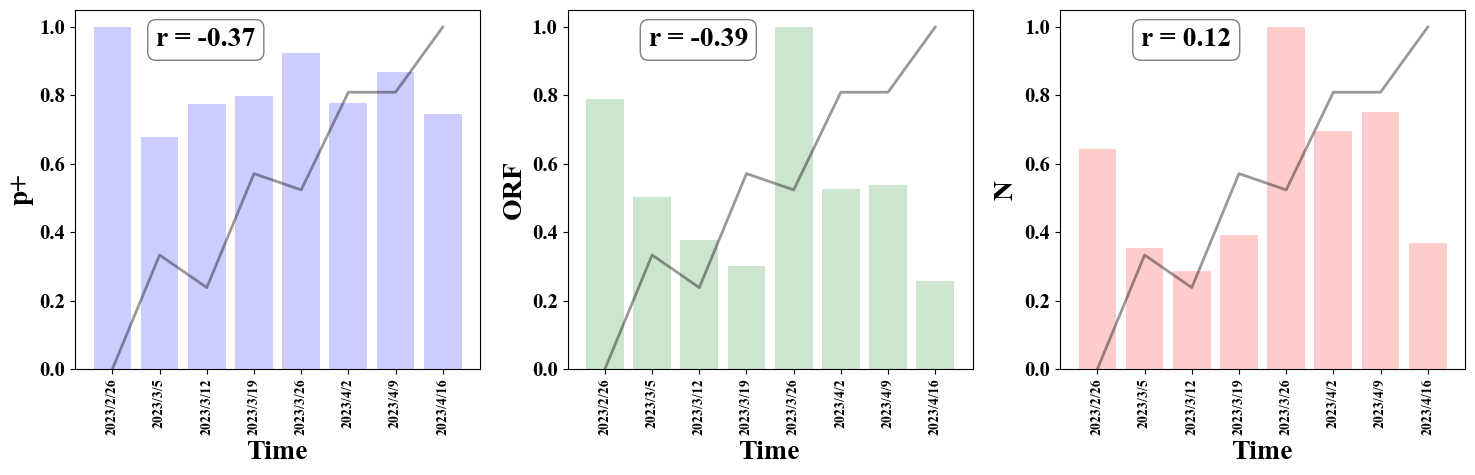

In [49]:
import datetime
import matplotlib.dates as mdates
from scipy.stats import pearsonr

plt.rc('font', family='Times New Roman')
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'font.weight': 'bold'})

# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['p+', 'ORF', 'N']:
    corr, p_val = pearsonr(site1_std_df['Overall'], var1_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['p+', 'ORF', 'N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var1_std_df.index, var1_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(var1_std_df.index, site1_std_df['Overall'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.20, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var1_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var1_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第一段污水_site.pdf', dpi=300)
plt.show()

C:\Users\ZERO\AppData\Local\Temp\ipykernel_10092\387626421.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_val = pearsonr(site1_std_df['Hospital'], var1_std_df[column])


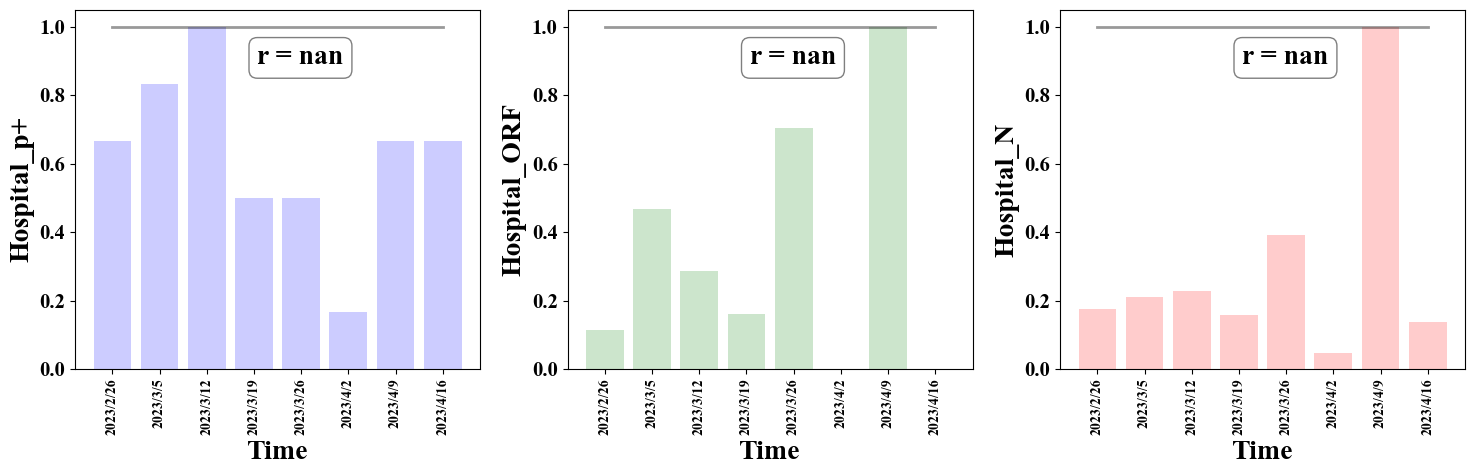

In [83]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']:
    corr, p_val = pearsonr(site1_std_df['Hospital'], var1_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var1_std_df.index, var1_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Hospital')
    
    # 绘制线图
    axs[i].plot(var1_std_df.index, site1_std_df['Hospital'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.45, 0.9, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var1_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var1_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第一段污水_医院.pdf', dpi=300)
plt.show()

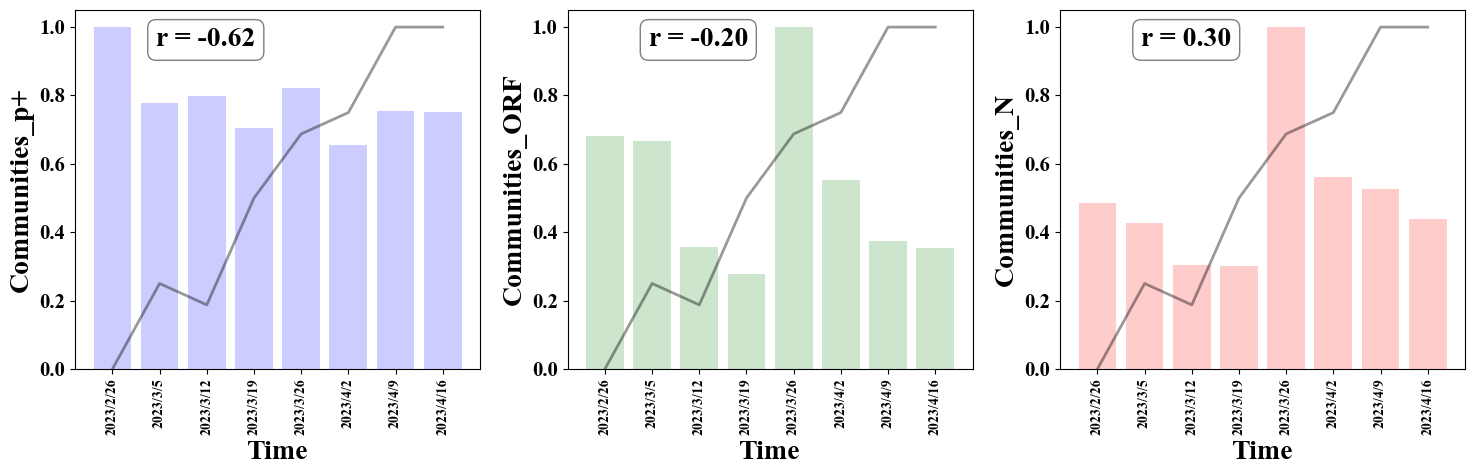

In [87]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['Communities_p+', 'Communities_ORF', 'Communities_N']:
    corr, p_val = pearsonr(site1_std_df['Communities'], var1_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Communities_p+', 'Communities_ORF', 'Communities_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var1_std_df.index, var1_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Communities')
    
    # 绘制线图
    axs[i].plot(var1_std_df.index, site1_std_df['Communities'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.2, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var1_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var1_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第一段污水_社区.pdf', dpi=300)
plt.show()

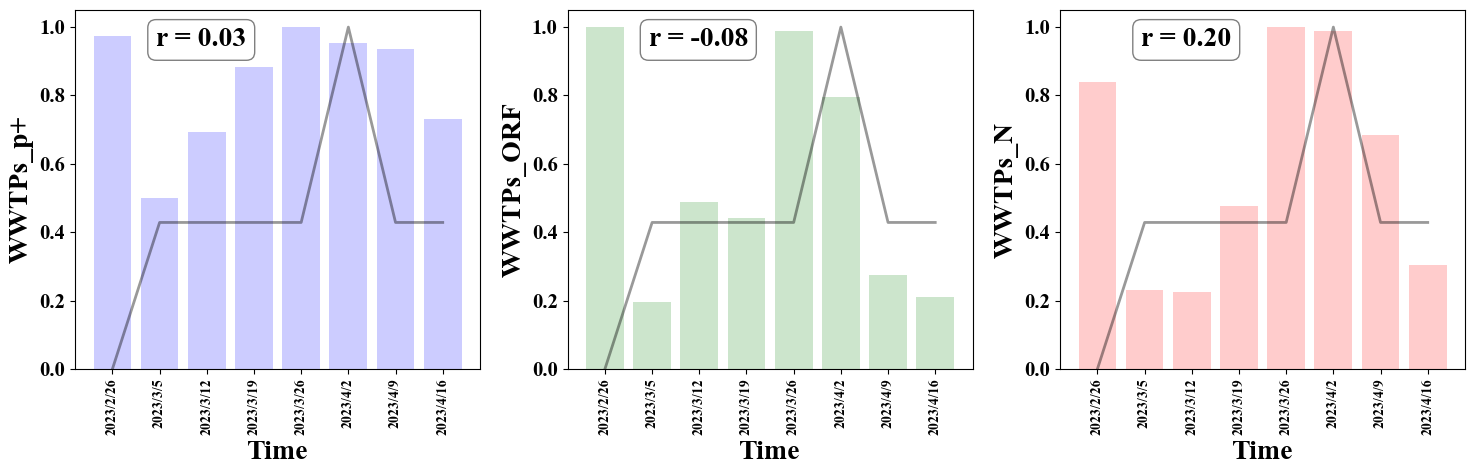

In [89]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']:
    corr, p_val = pearsonr(site1_std_df['WWTPs'], var1_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var1_std_df.index, var1_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs WWTPs')
    
    # 绘制线图
    axs[i].plot(var1_std_df.index, site1_std_df['WWTPs'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.2, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var1_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var1_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第一段污水_污水处理厂.pdf', dpi=300)
plt.show()

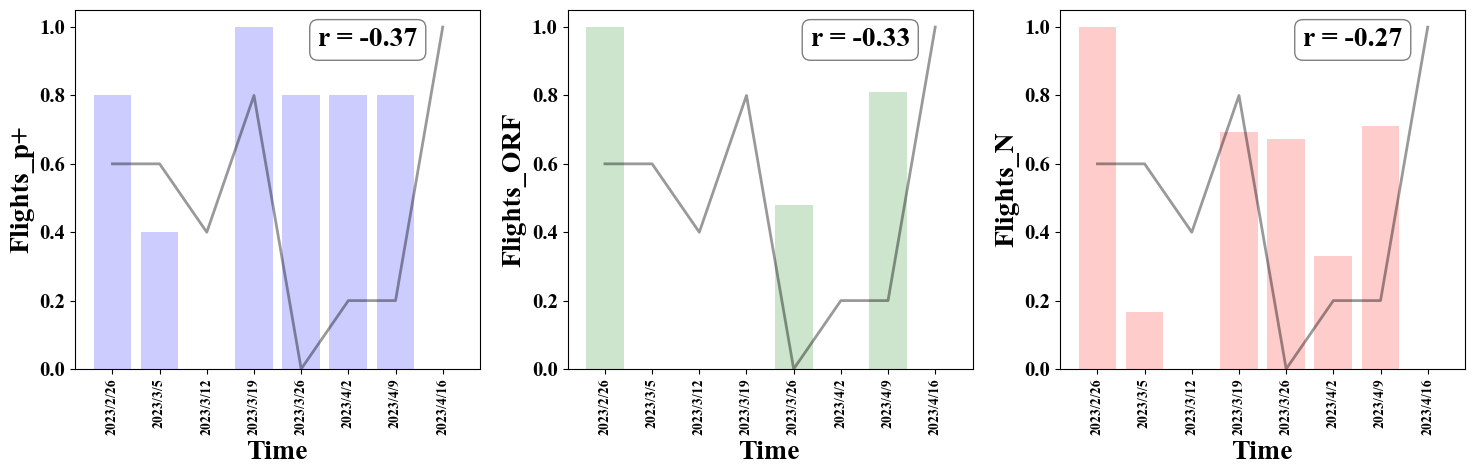

In [93]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['Flights_p+', 'Flights_ORF', 'Flights_N']:
    corr, p_val = pearsonr(site1_std_df['Flights'], var1_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Flights_p+', 'Flights_ORF', 'Flights_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var1_std_df.index, var1_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Flights')
    
    # 绘制线图
    axs[i].plot(var1_std_df.index, site1_std_df['Flights'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.6, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var1_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var1_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第一段污水_飞机.pdf', dpi=300)
plt.show()

### Site CORR 2

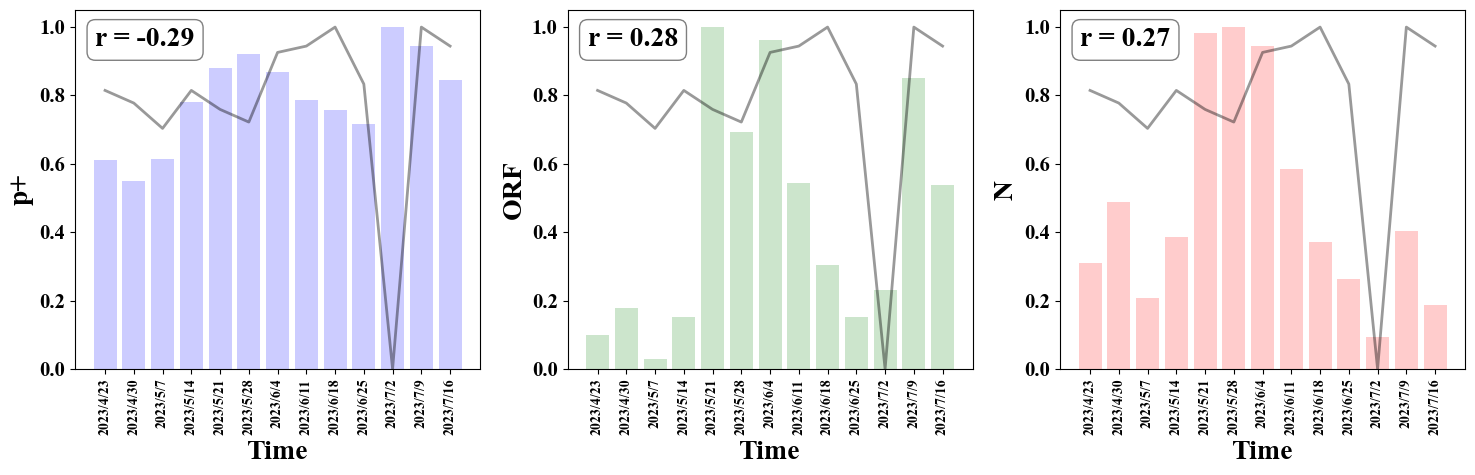

In [96]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['p+', 'ORF', 'N']:
    corr, p_val = pearsonr(site2_std_df['Overall'], var2_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['p+', 'ORF', 'N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var2_std_df.index, var2_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(var2_std_df.index, site2_std_df['Overall'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var2_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var2_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第二段污水_site.pdf', dpi=300)
plt.show()

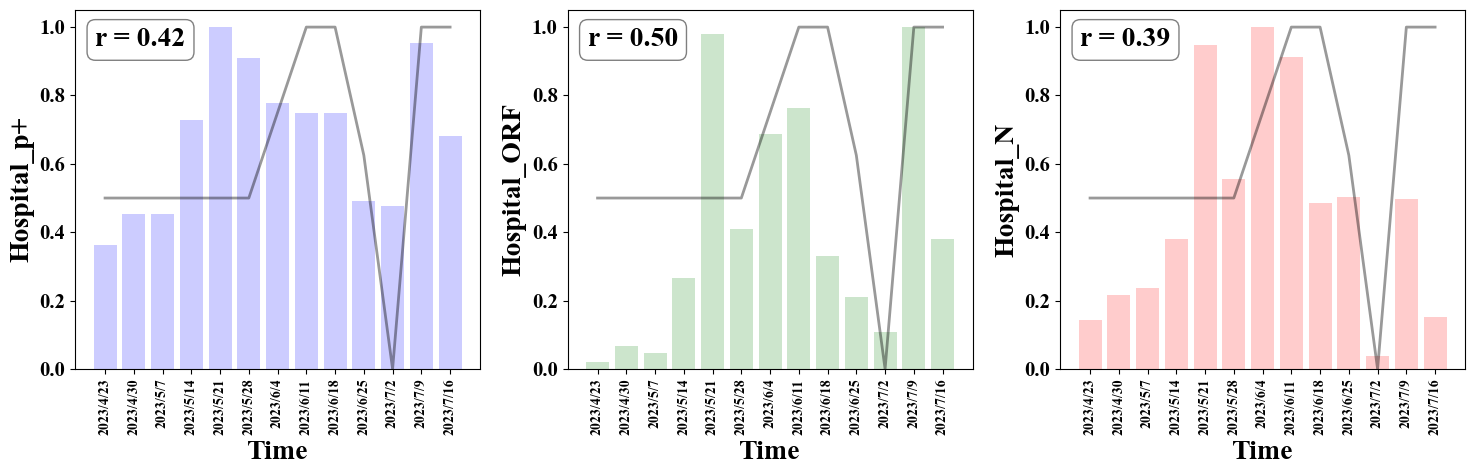

In [99]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']:
    corr, p_val = pearsonr(site2_std_df['Hospital'], var2_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var2_std_df.index, var2_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Hospital')
    
    # 绘制线图
    axs[i].plot(var2_std_df.index, site2_std_df['Hospital'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var2_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var2_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第二段污水_医院.pdf', dpi=300)
plt.show()

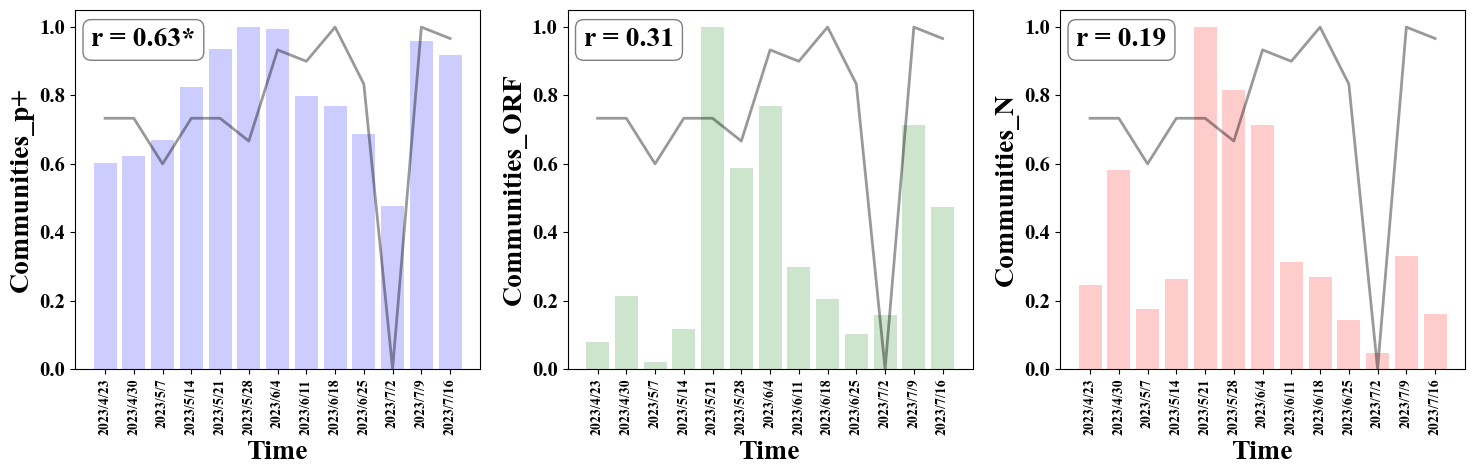

In [104]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['Communities_p+', 'Communities_ORF', 'Communities_N']:
    corr, p_val = pearsonr(site2_std_df['Communities'], var2_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Communities_p+', 'Communities_ORF', 'Communities_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var2_std_df.index, var2_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Communities')
    
    # 绘制线图
    axs[i].plot(var2_std_df.index, site2_std_df['Communities'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.04, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var2_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var2_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第二段污水_社区.pdf', dpi=300)
plt.show()

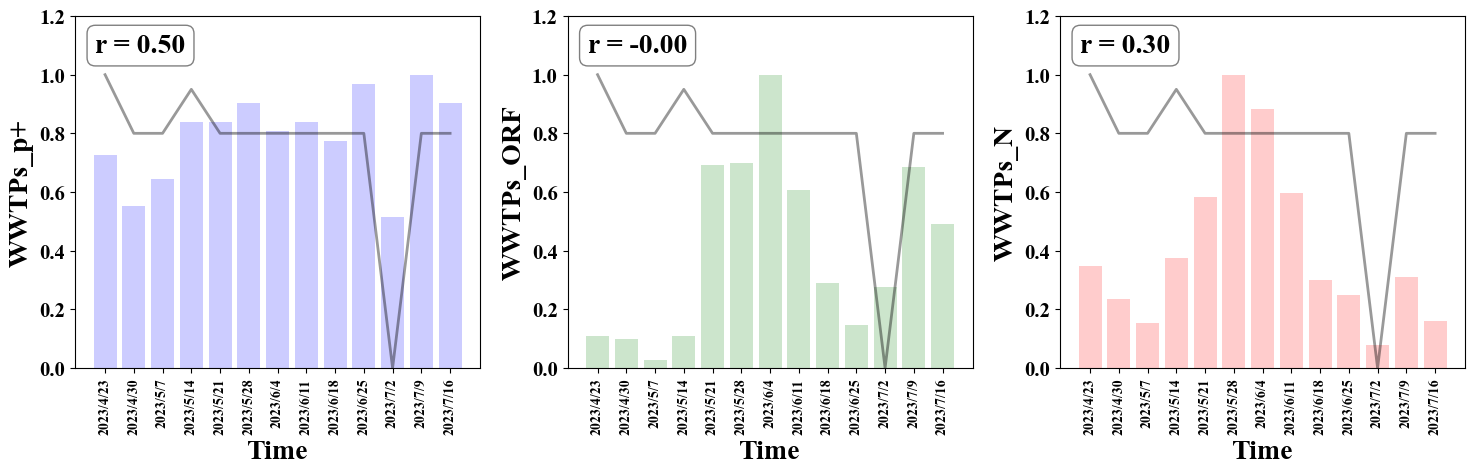

In [118]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']:
    corr, p_val = pearsonr(site2_std_df['WWTPs'], var2_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var2_std_df.index, var2_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs WWTPs')
    
    # 绘制线图
    axs[i].plot(var2_std_df.index, site2_std_df['WWTPs'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var2_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var2_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
    axs[i].set_ylim(0,1.2)
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第二段污水_污水处理厂.pdf', dpi=300)
plt.show()

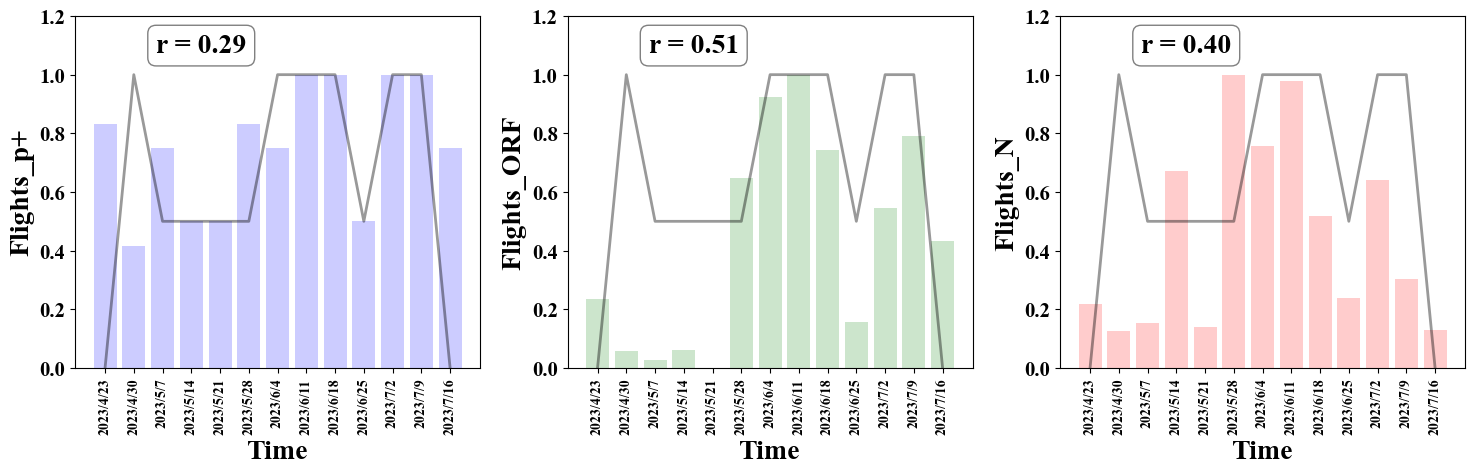

In [125]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['Flights_p+', 'Flights_ORF', 'Flights_N']:
    corr, p_val = pearsonr(site2_std_df['Flights'], var2_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Flights_p+', 'Flights_ORF', 'Flights_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var2_std_df.index, var2_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Flights')
    
    # 绘制线图
    axs[i].plot(var2_std_df.index, site2_std_df['Flights'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.2, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var2_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var2_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
    axs[i].set_ylim(0,1.2)
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第二段污水_飞机.pdf', dpi=300)
plt.show()

### Site CORR 3

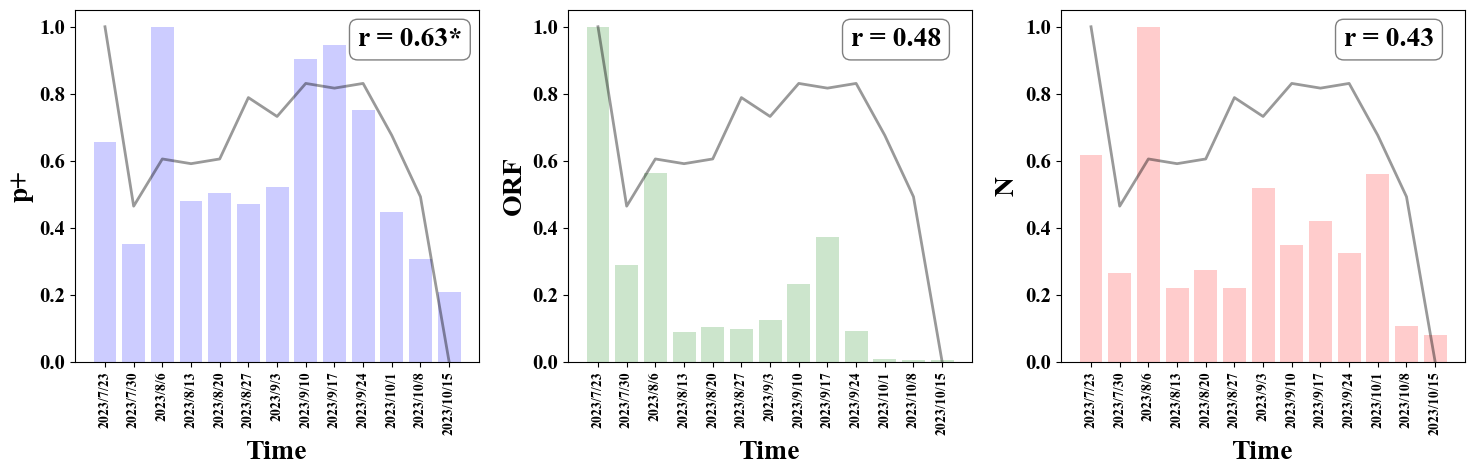

In [129]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['p+', 'ORF', 'N']:
    corr, p_val = pearsonr(site3_std_df['Overall'], var3_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['p+', 'ORF', 'N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var3_std_df.index, var3_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Overall')
    
    # 绘制线图
    axs[i].plot(var3_std_df.index, site3_std_df['Overall'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.7, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var3_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var3_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第三段污水_site.pdf', dpi=300)
plt.show()

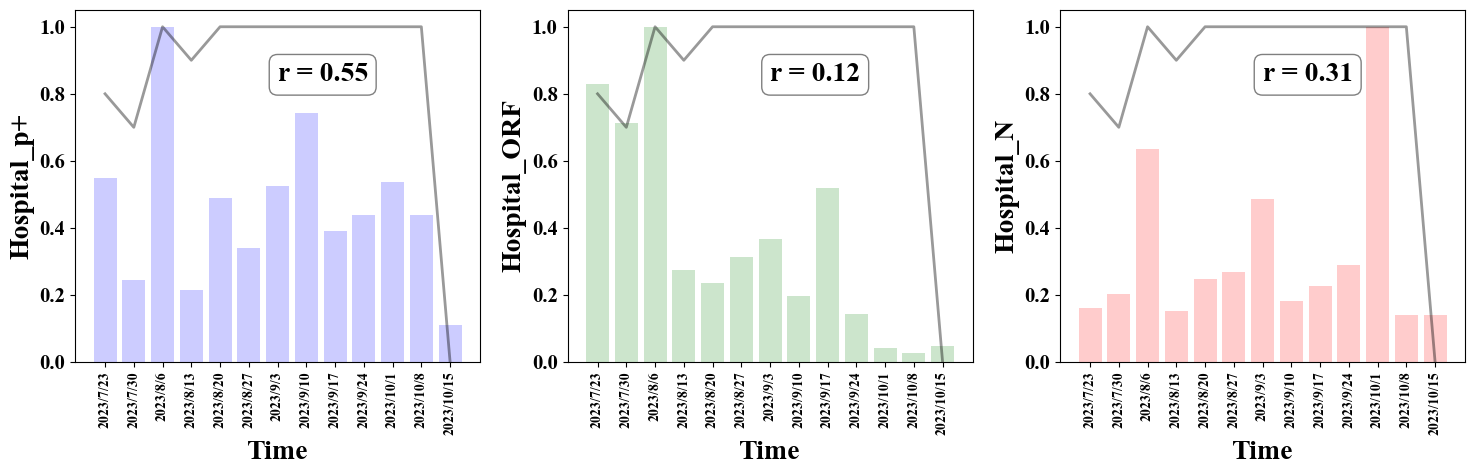

In [136]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']:
    corr, p_val = pearsonr(site3_std_df['Hospital'], var3_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Hospital_p+', 'Hospital_ORF', 'Hospital_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var3_std_df.index, var3_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Hospital')
    
    # 绘制线图
    axs[i].plot(var3_std_df.index, site3_std_df['Hospital'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.5, 0.85, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var3_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var3_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第三段污水_医院.pdf', dpi=300)
plt.show()

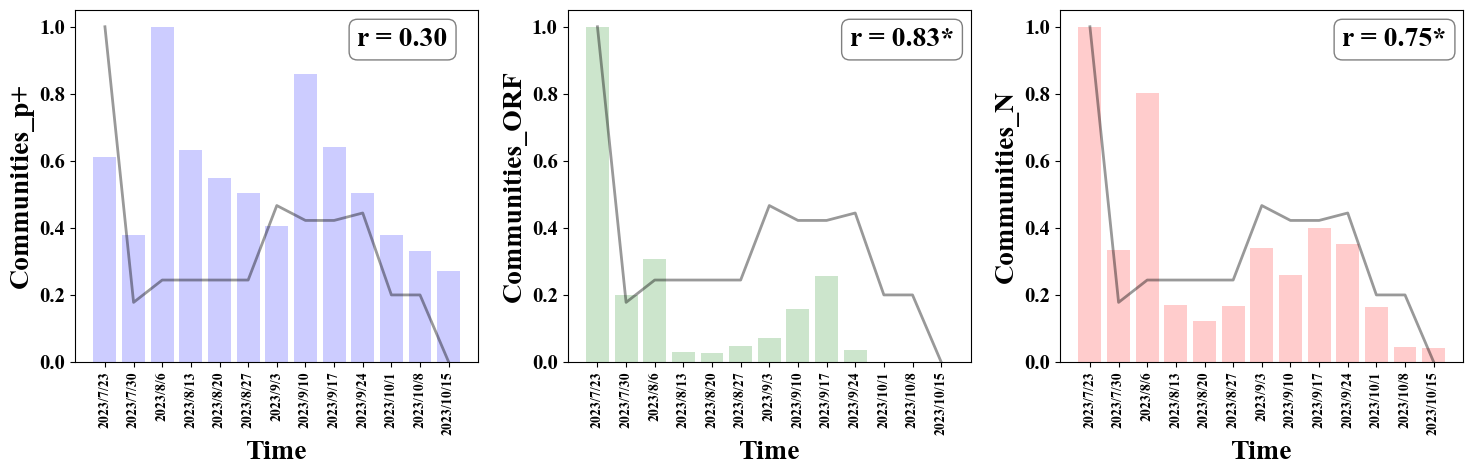

In [140]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['Communities_p+', 'Communities_ORF', 'Communities_N']:
    corr, p_val = pearsonr(site3_std_df['Communities'], var3_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Communities_p+', 'Communities_ORF', 'Communities_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var3_std_df.index, var3_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Communities')
    
    # 绘制线图
    axs[i].plot(var3_std_df.index, site3_std_df['Communities'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.7, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var3_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var3_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第三段污水_社区.pdf', dpi=300)
plt.show()

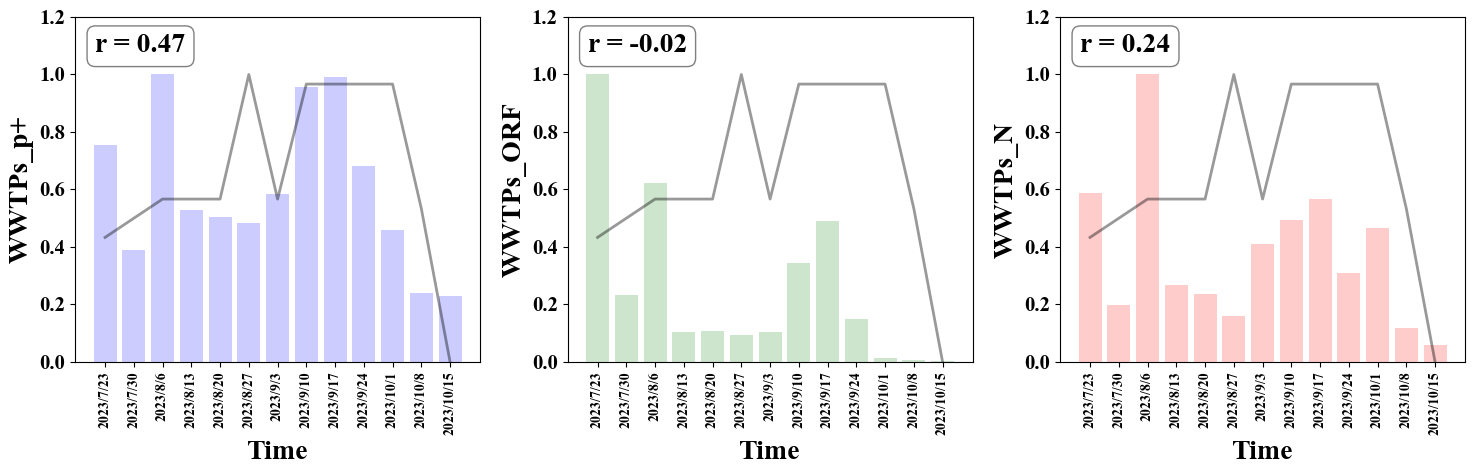

In [145]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']:
    corr, p_val = pearsonr(site3_std_df['WWTPs'], var3_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['WWTPs_p+', 'WWTPs_ORF', 'WWTPs_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var3_std_df.index, var3_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs WWTPs')
    
    # 绘制线图
    axs[i].plot(var3_std_df.index, site3_std_df['WWTPs'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.05, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var3_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var3_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
    axs[i].set_ylim(0,1.2)
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第三段污水_污水处理厂.pdf', dpi=300)
plt.show()

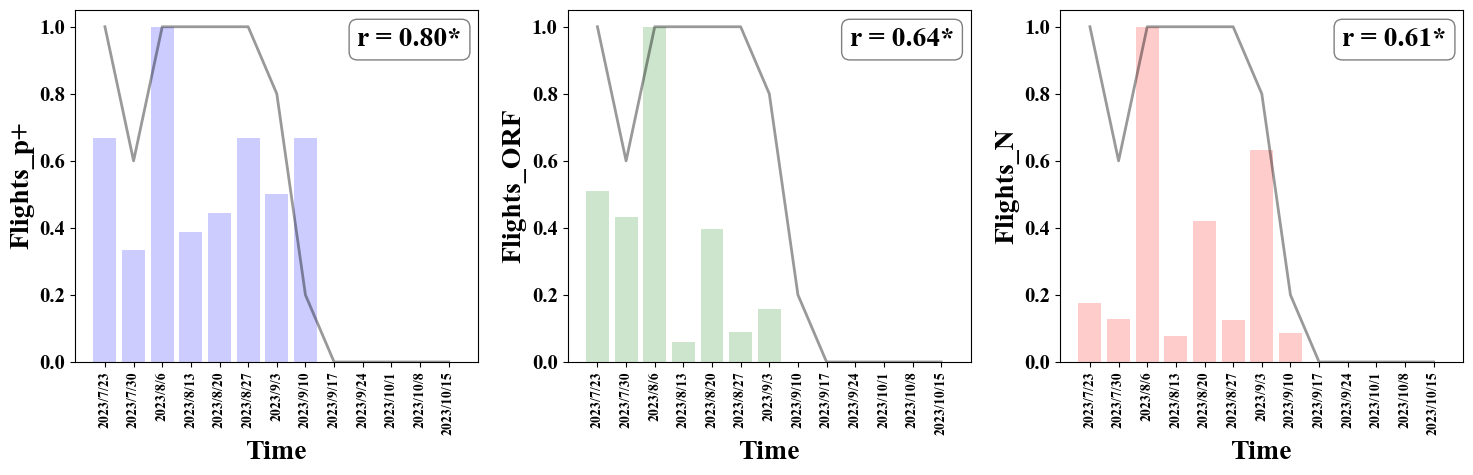

In [150]:
# 计算相关系数和 p 值
correlations = {}
p_values = {}

for column in ['Flights_p+', 'Flights_ORF', 'Flights_N']:
    corr, p_val = pearsonr(site3_std_df['Flights'], var3_std_df[column])
    correlations[column] = corr
    p_values[column] = p_val



fig, axs = plt.subplots(1, 3, figsize=(15, 5))
columns = ['Flights_p+', 'Flights_ORF', 'Flights_N']
colors = ['b', 'g', 'r']

# 绘制子图
for i, column in enumerate(columns):
    # 绘制散点图
    axs[i].bar(var3_std_df.index, var3_std_df[column], color=colors[i], alpha = 0.2, label=f'{column} vs Flights')
    
    # 绘制线图
    axs[i].plot(var3_std_df.index, site3_std_df['Flights'], color= 'k', linestyle='-', linewidth = 2,alpha = 0.4)

    # 获取相关系数和p值
    corr = correlations[column]
    p_val = p_values[column]

    # 标记相关系数及其显著性
    significance = '*' if p_val < 0.05 else ''
    axs[i].text(0.7, 0.95, f'r = {corr:.2f}{significance}', transform=axs[i].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # 设置标题和标签
    #axs[i].set_title(f'Overall vs {column}')
    axs[i].set_xlabel('Time', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    axs[i].set_ylabel(column, fontdict={'fontsize': 20, 'fontweight': 'bold'})
    num_ticks = len(var3_std_df.index)  # 根据数据点数设置刻度数量
    axs[i].set_xticks(np.arange(0, num_ticks, step=1))  # 设置刻度位置，间隔为1
    axs[i].set_xticklabels(var3_std_df.index, rotation=90, fontsize=10)  # 设置刻度标签并旋转
    #axs[i].set_ylim(0,1.2)
# 调整布局
plt.tight_layout()
plt.savefig('D:\\Research\\Project\\PROJECTS\\COVID-19\\污水\\version_2\\第三段污水_飞机.pdf', dpi=300)
plt.show()